# Importando bibliotecas

In [39]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

import matplotlib.pyplot as plt
import seaborn as sns

import modelos as m

#Para esconder os avisos do curvefit():
import warnings
warnings.filterwarnings("ignore")

# para não precisar reiniciar o kernel do jupyter-notebook quando mudar os arquivos .py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Lendo dados

In [46]:
dadosdf = m.carrega_pickles()

dadosdf_resultados = m.carrega_pickles()

Lendo porquinho_mra26.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra33.pickle			
Lendo porquinho_mra34.pickle			
Lendo porquinho_mra26.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra33.pickle			
Lendo porquinho_mra34.pickle			


In [41]:
dadosdf.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",0
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",0
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",0
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",0
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",0


## Incluindo volume esperado no dataframe

In [47]:
v_esperado = {
    "mra26": 2622.9,
    "mra28": 2105.9,
    "mra29": 2205.7,
    "mra31": 1974.4,
    "mra32": 1440.2,
    "mra33": 2154.6,
    "mra34": 2211.2
}

dadosdf["volume_esperado"] = dadosdf.apply(lambda row: v_esperado[row.Animal], axis=1)
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""

df_final = pd.DataFrame()
df_final['modelo'] = ""
df_final['metodo'] = ""
df_final['norma_do_erro'] = ""
df_final['erro_medio'] = ""
df_final['ajustados'] = ""

dadosdf.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",2622.9,,,,
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",2622.9,,,,
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",2622.9,,,,
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9,,,,
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9,,,,


## Testando modelos

### Teste 1 - Etapa 2

#### Modelo sigmoidvenegas1 - Com estimativa inicial
#### Método lm

In [48]:
Vmin =  500 # mL
Vmax = 3500 # mL

	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [ -294.7  1695.6    28.1     6.4 ]
	Caso 2 (mra26) deu erro... Steps:4
Testando caso 3: mra28: [ -202.9   921.0    20.6     3.6 ]
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [ -297.5  1384.2    23.7     5.6 ]
Testando caso 6: mra29: [ -247.6   968.3    23.7     4.3 ]
	Caso 7 (mra29) deu erro... Steps:3
Testando caso 8: mra29: [ -342.9  1219.1    23.2     4.9 ]
Testando caso 9: mra31: [ -327.8  1137.7    20.1     7.1 ]
	Caso 10 (mra31) deu erro... Steps:3
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [-21789.2 40250.5    15.2 0.023 ]
	Caso 14 (mra32) deu erro... Steps:3
Testando caso 15: mra33: [ -498.8  4714.3    37.6    11.8 ]
	Caso 16 (mra33) deu erro... Steps:3
Testando caso 17: mra33: [ -303.9  1431.4    21.6     7.3 ]
	Caso 18 (mra34) deu erro... Steps:4
	Caso 19 (mra34) deu erro... Steps:5
	Caso 20 (mra34) d

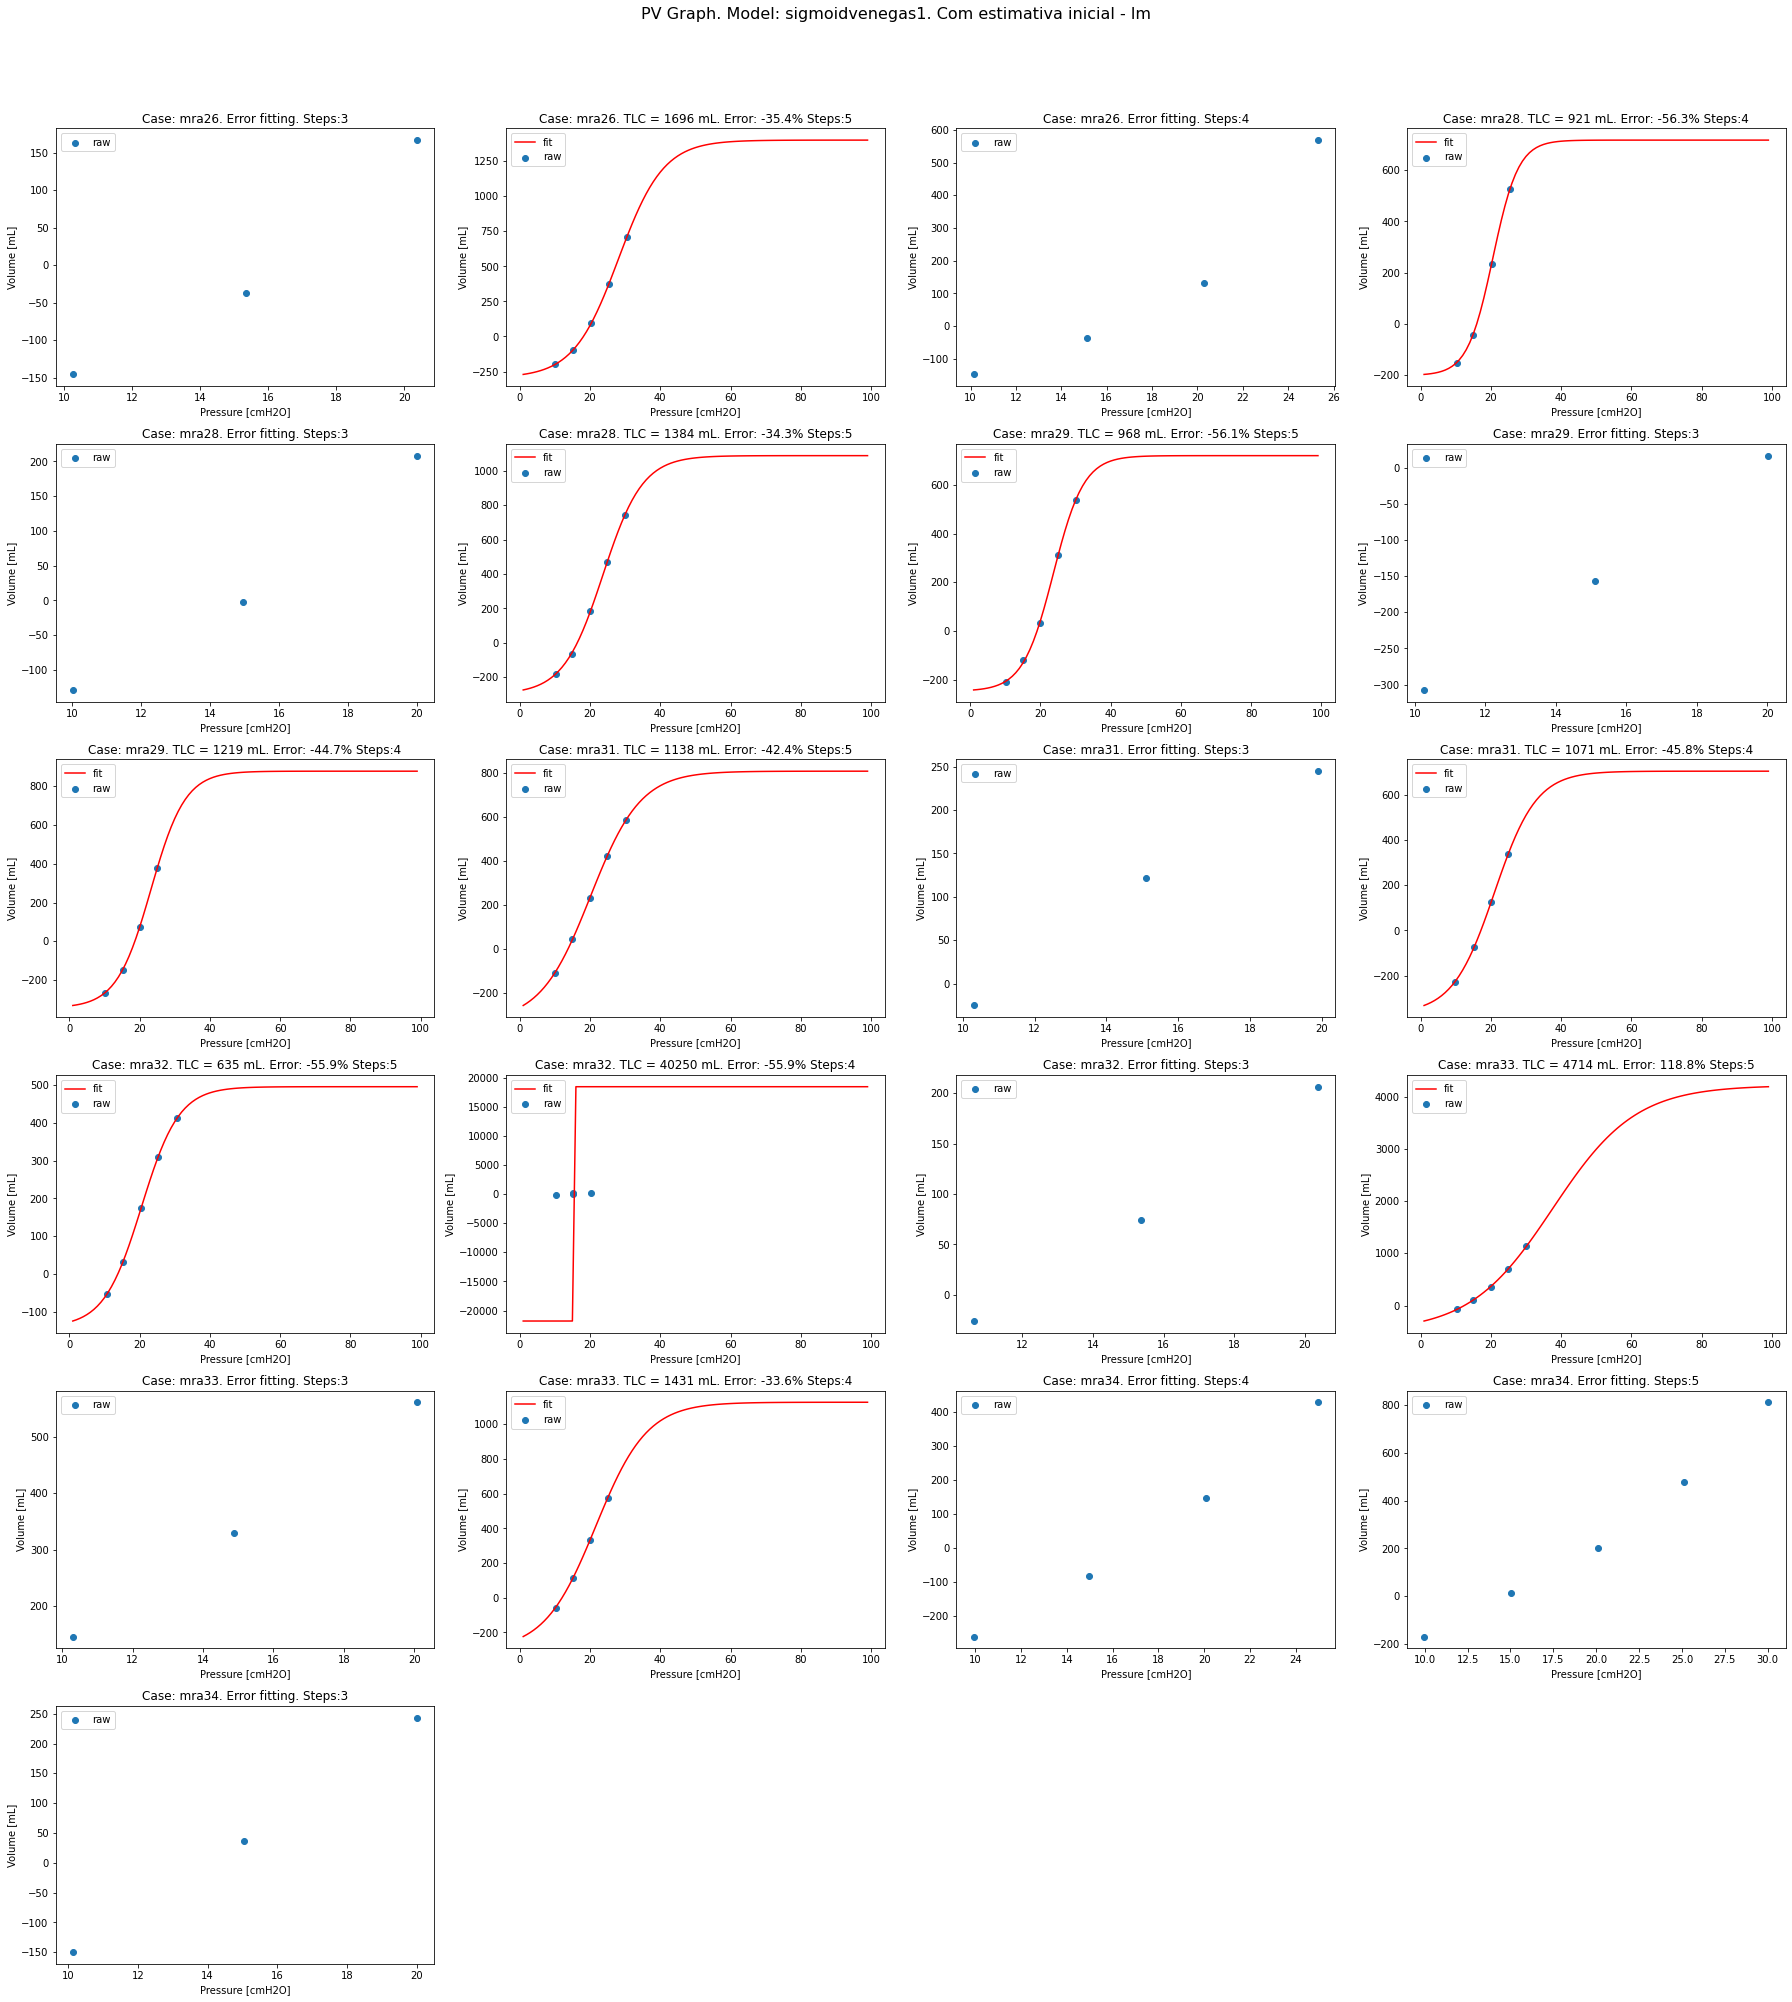

Norma(erro): 181.6. Erro médio: 52.31%. Ajustados: 10.


In [49]:
modelo = m.sigmoidvenegas1
metodo = 'lm'
texto = 'Com estimativa inicial - lm'
TLC_index = 1
meu_p0 =      [  -200, 2000,   25,      5]
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas1 - Com estimativa inicial, Com condições de contorno.
#### Método dogbox

Testando caso 0: mra26: [ -240.3  1999.2    28.8     6.2 ]
Testando caso 1: mra26: [ -294.7  1695.6    28.1     6.4 ]
Testando caso 2: mra26: [ -188.2  3500.0    32.1     5.2 ]
Testando caso 3: mra28: [ -202.9   921.0    20.6     3.6 ]
Testando caso 4: mra28: [ -280.9  1998.4    28.2     7.3 ]
Testando caso 5: mra28: [ -297.5  1384.2    23.7     5.6 ]
Testando caso 6: mra29: [ -247.6   968.3    23.7     4.3 ]
Testando caso 7: mra29: [ -500.0   812.5    16.9     5.7 ]
Testando caso 8: mra29: [ -342.9  1219.1    23.2     4.9 ]
Testando caso 9: mra31: [ -327.8  1137.7    20.1     7.1 ]
Testando caso 10: mra31: [ -499.9   957.1    10.4     7.6 ]
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [ -500.0   500.0    40.0     2.0 ]
Testando caso 14: mra32: [ -317.0  1996.3    34.1    13.3 ]
Testando caso 15: mra33: [ -413.4  3500.0    32.5     9.9 ]
Testando caso 16: mra33: [ -427.7  1958.4    19.9 

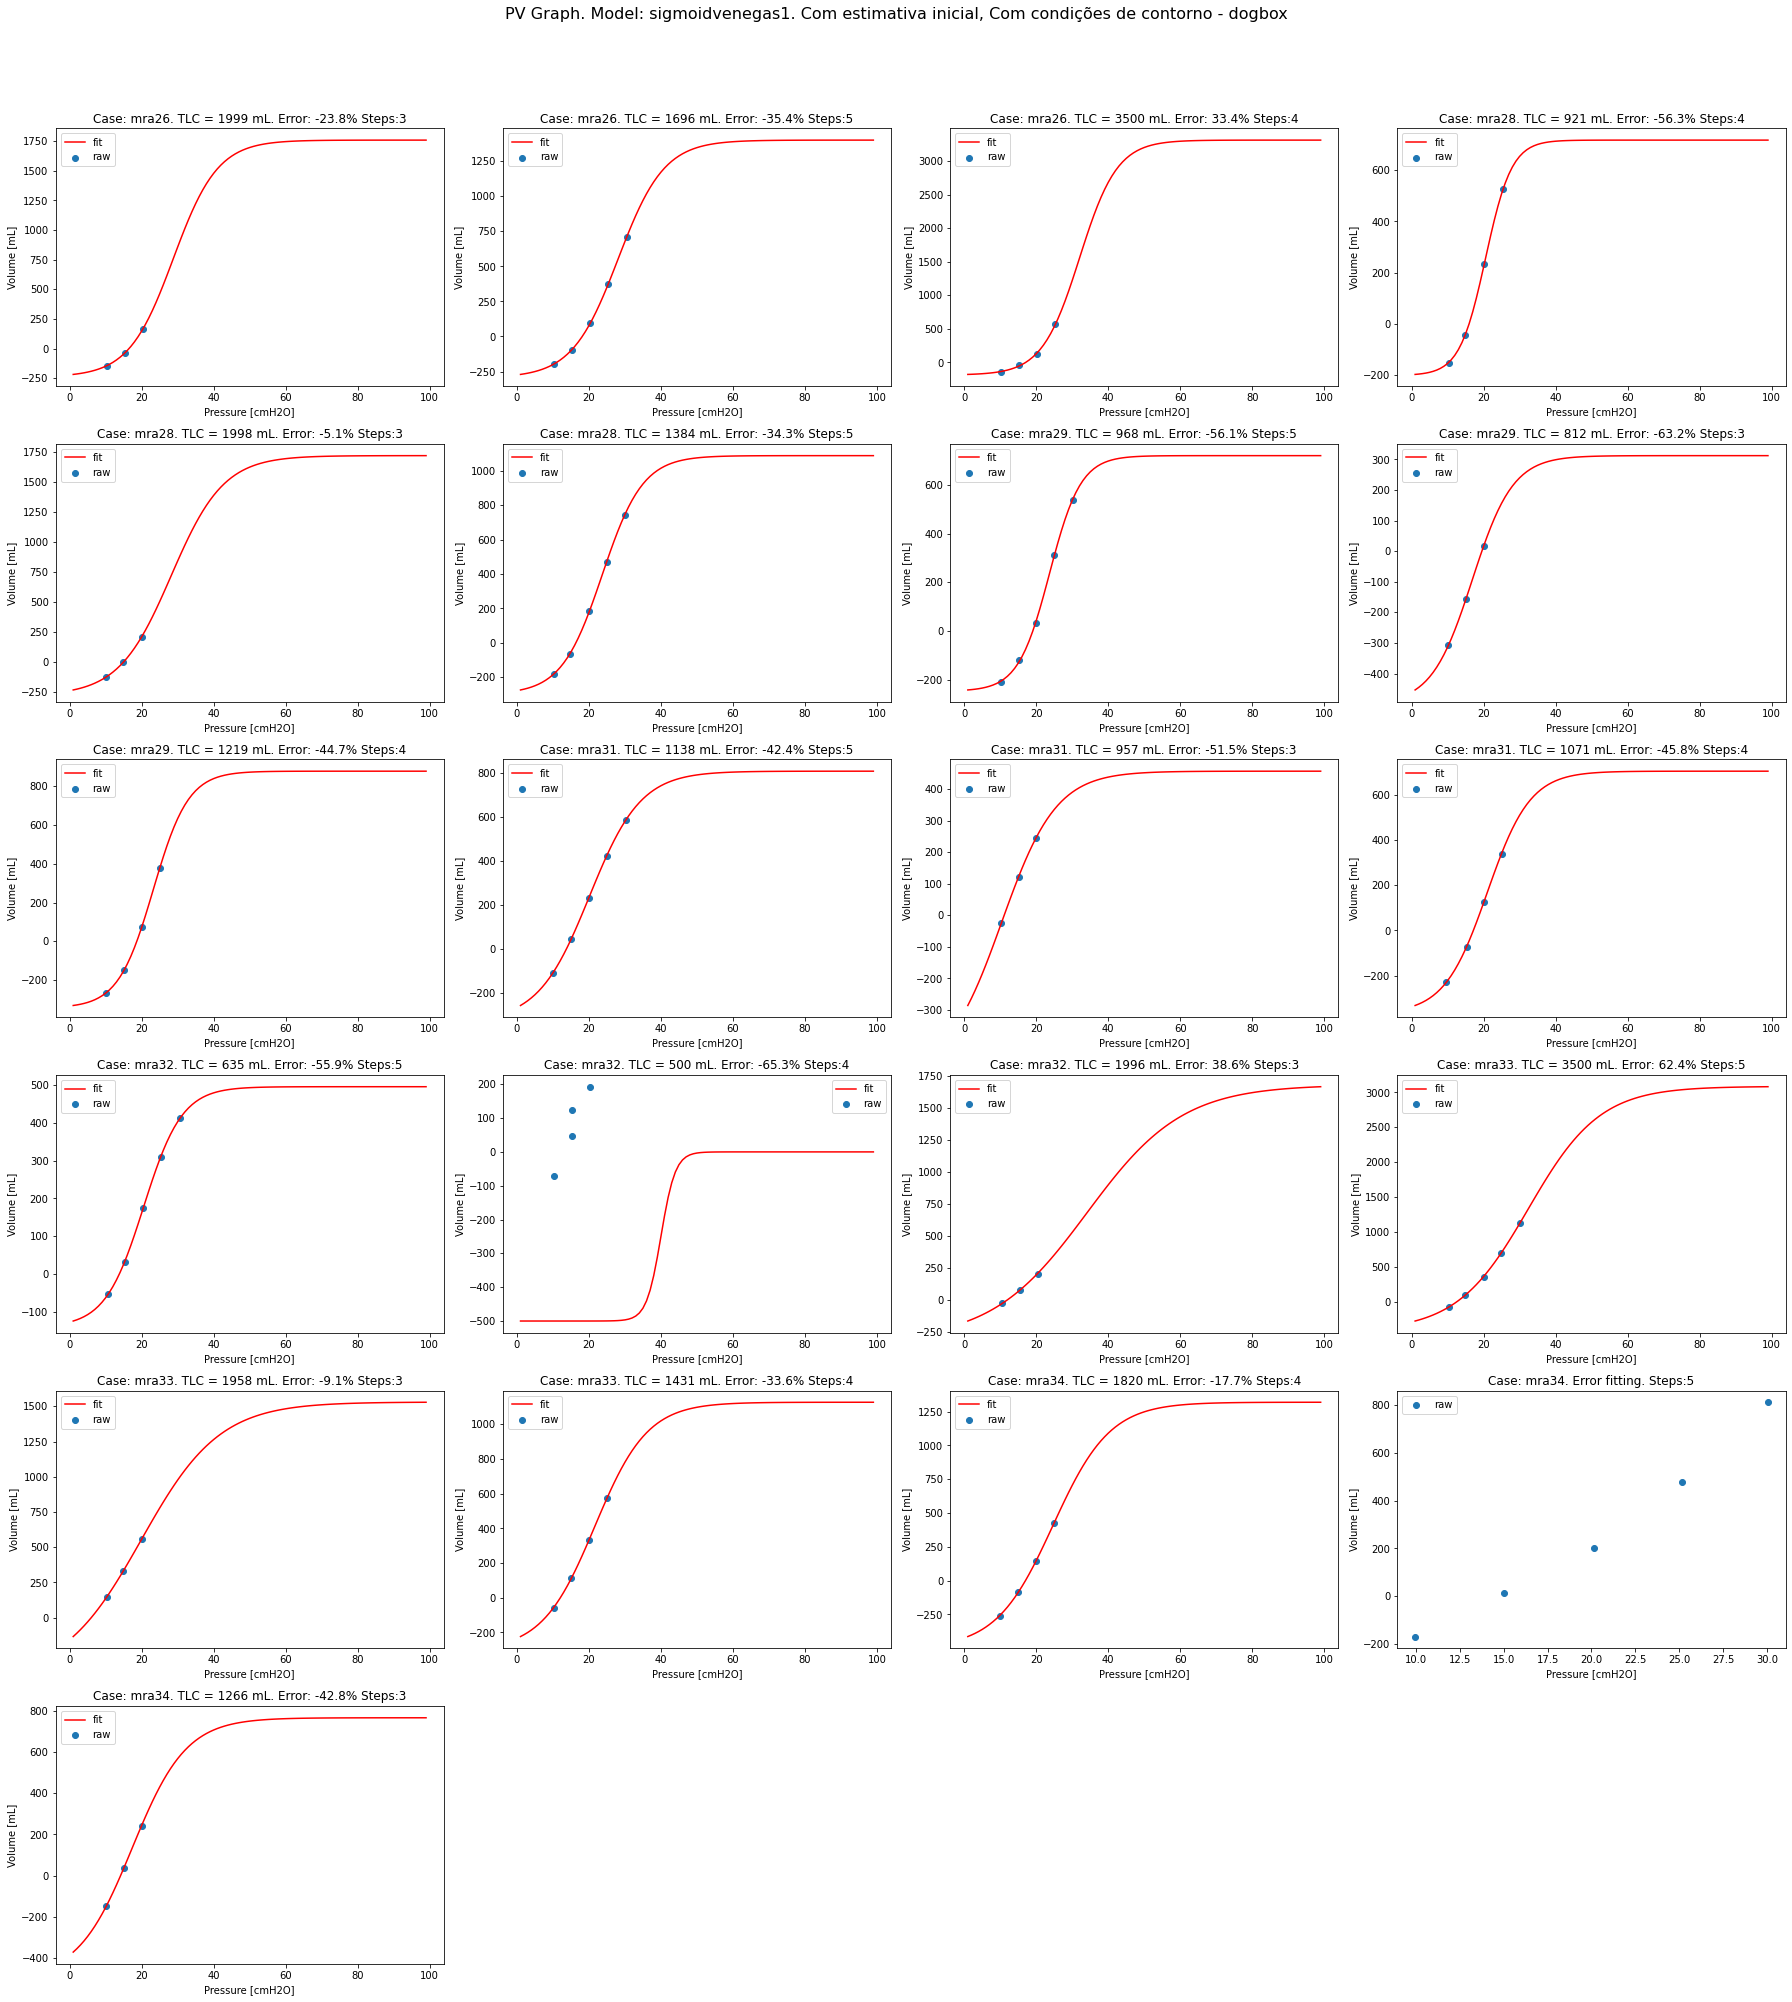

Norma(erro): 197.8. Erro médio: 40.86%. Ajustados: 20.


In [50]:
modelo = m.sigmoidvenegas1
metodo = 'dogbox'
texto = 'Com estimativa inicial, Com condições de contorno - dogbox'
TLC_index = 1
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  -200, 2000,   25,      5]
meus_bounds = ([  -500, Vmin,    0,      2],
              [   500, Vmax,   40,     40])
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas1 - Com estimativa inicial, com condições de contorno.
#### Método trf

Testando caso 0: mra26: [ -239.5  1936.6    28.5     6.1 ]
Testando caso 1: mra26: [ -294.7  1695.6    28.1     6.4 ]
Testando caso 2: mra26: [ -188.2  3500.0    32.1     5.2 ]
Testando caso 3: mra28: [ -202.9   921.0    20.6     3.6 ]
Testando caso 4: mra28: [ -279.8  1955.6    28.0     7.2 ]
Testando caso 5: mra28: [ -297.5  1384.2    23.7     5.6 ]
Testando caso 6: mra29: [ -247.6   968.3    23.7     4.3 ]
Testando caso 7: mra29: [ -467.9   723.2    16.5     5.0 ]
Testando caso 8: mra29: [ -342.9  1219.1    23.2     4.9 ]
Testando caso 9: mra31: [ -327.8  1137.7    20.1     7.1 ]
Testando caso 10: mra31: [ -499.8   957.0    10.4     7.6 ]
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [ -500.0   500.0    40.0     2.0 ]
Testando caso 14: mra32: [ -284.6  1537.1    29.1    11.6 ]
Testando caso 15: mra33: [ -413.4  3500.0    32.5     9.9 ]
	Caso 16 (mra33) deu erro... Steps:3
Testando caso

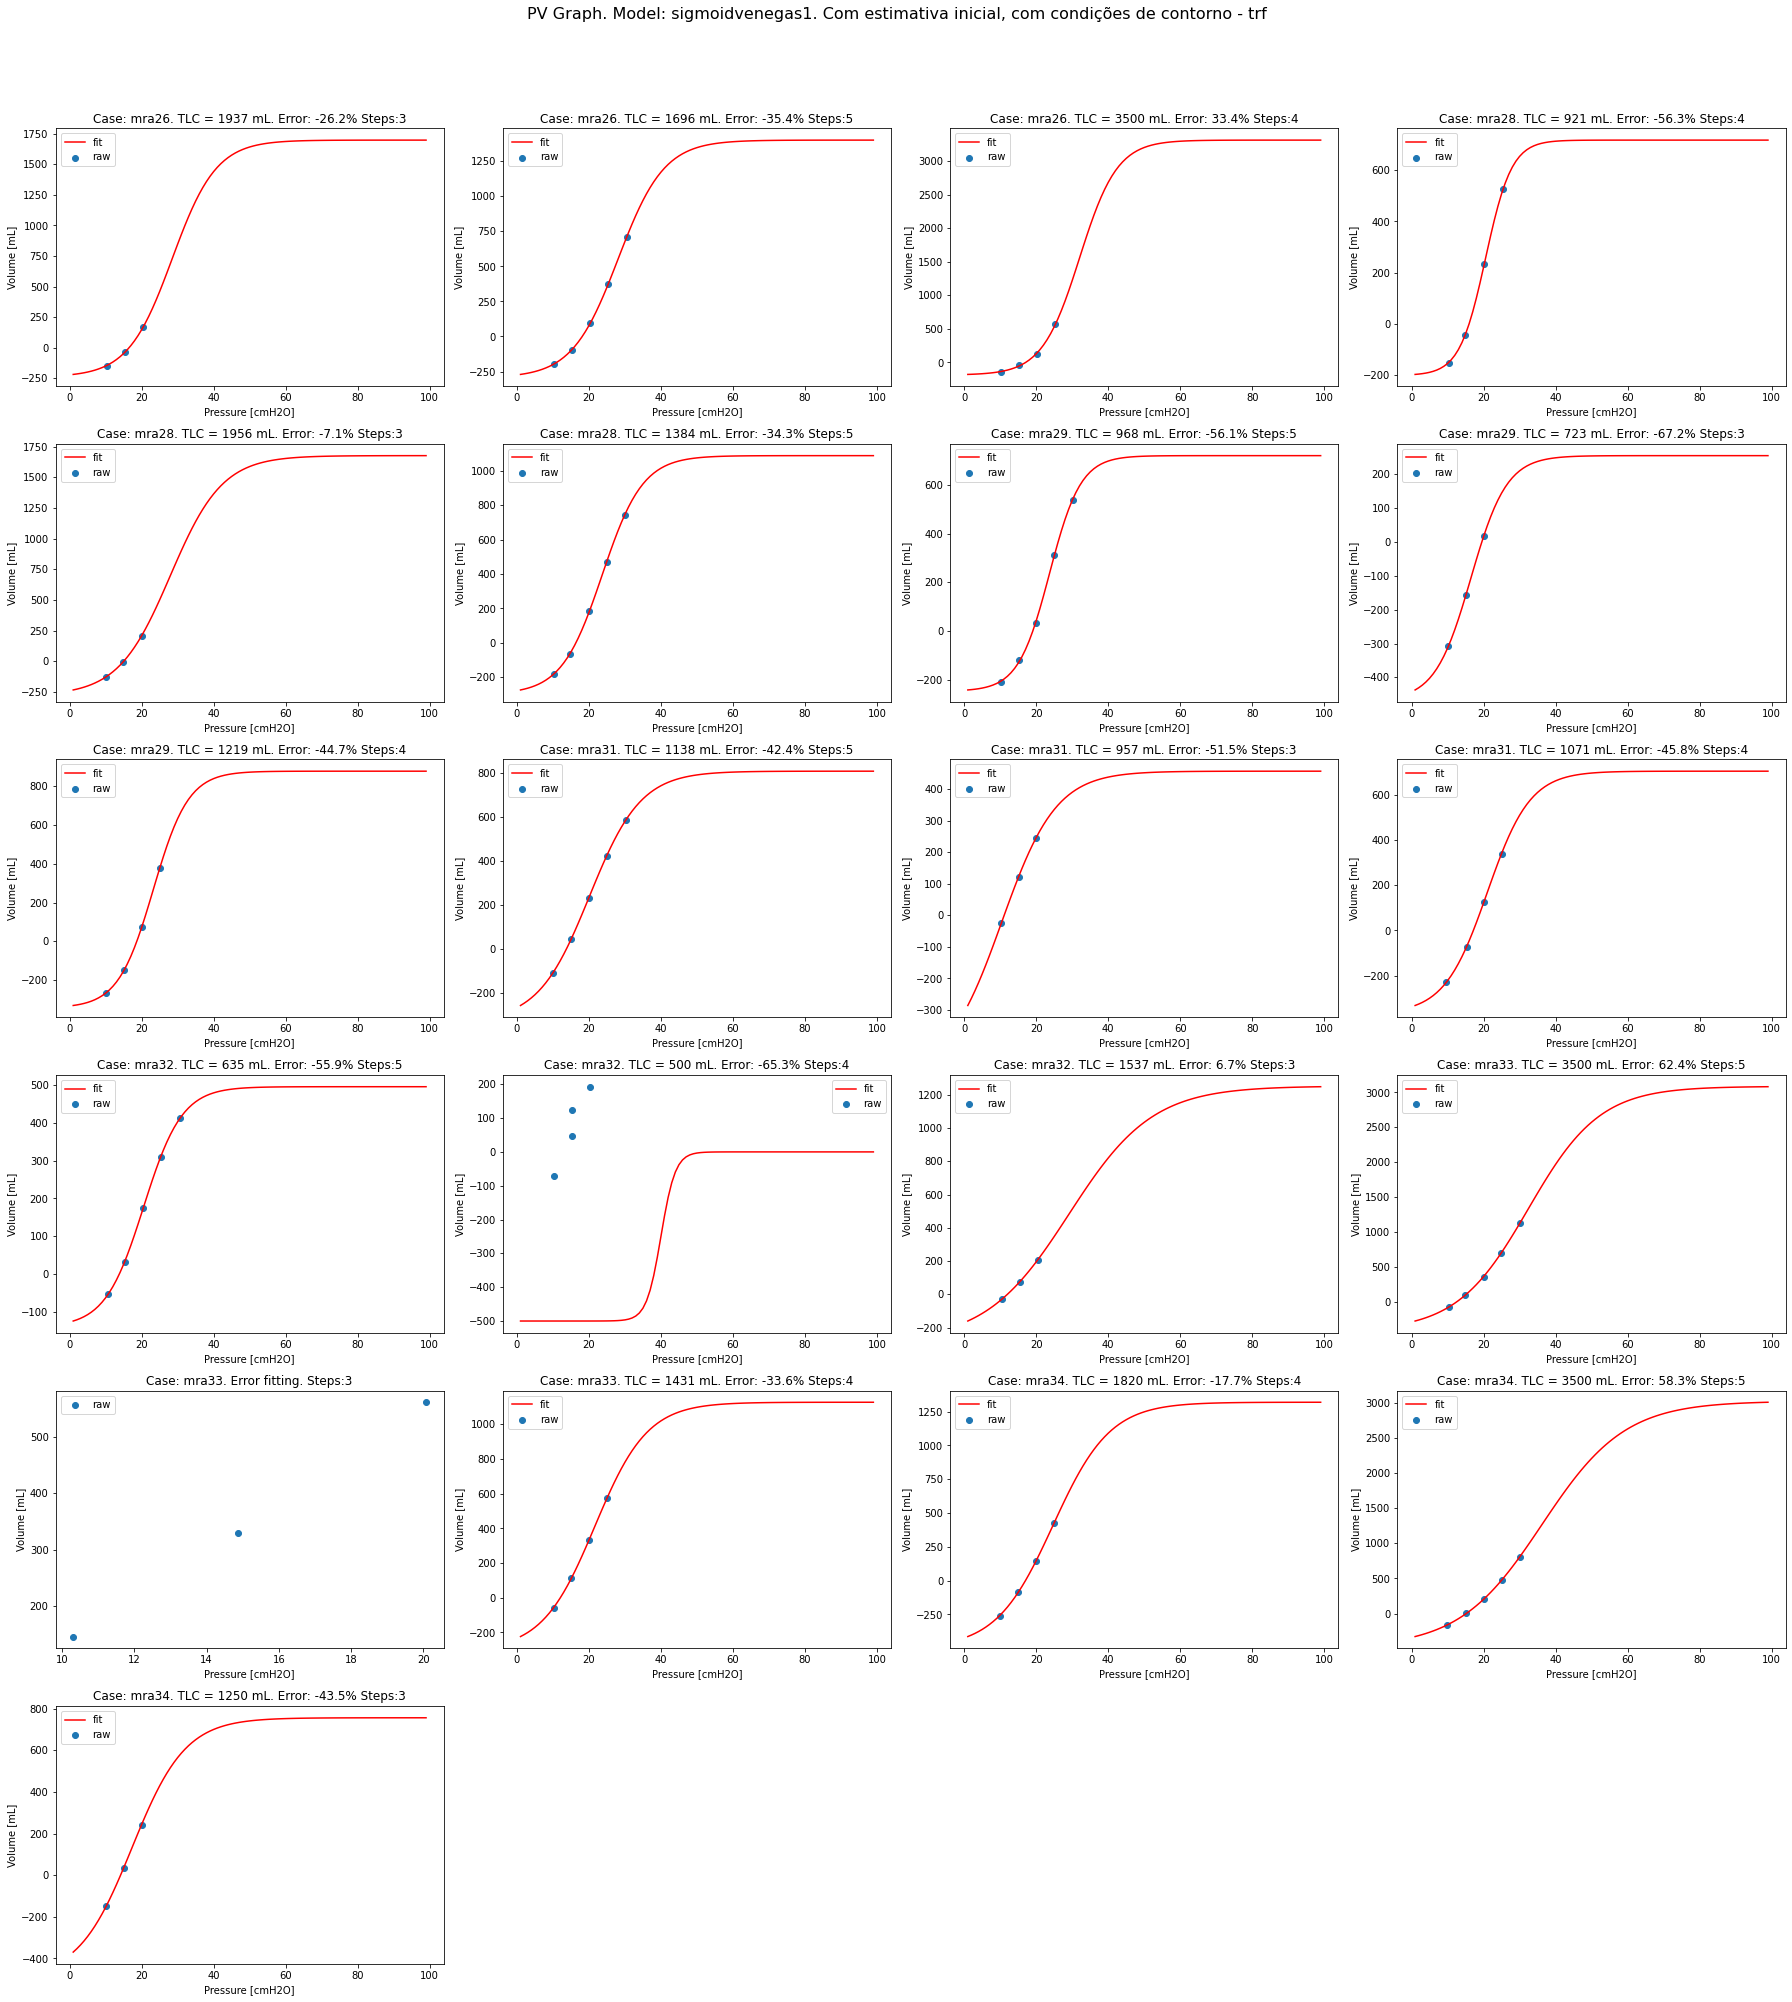

Norma(erro): 204.2. Erro médio: 42.19%. Ajustados: 20.


In [51]:
modelo = m.sigmoidvenegas1
metodo = 'trf'
texto = 'Com estimativa inicial, com condições de contorno - trf'
TLC_index = 1
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  -200, 2000,   25,      5]
meus_bounds = ([  -500, Vmin,    0,      2],
              [   500, Vmax,   40,     40])
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidpaivaoffset - Com estimativa inicial
#### Método lm

	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [ 1695.6 0.048 0.156  -294.7 ]
Testando caso 2: mra26: [11168449068.3 0.069 0.157  -209.7 ]
Testando caso 3: mra28: [  921.0 0.320 0.276  -202.9 ]
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [ 1384.2 0.048 0.177  -297.5 ]
Testando caso 6: mra29: [  968.3 0.241 0.230  -247.6 ]
	Caso 7 (mra29) deu erro... Steps:3
Testando caso 8: mra29: [ 1219.1 0.095 0.205  -342.9 ]
Testando caso 9: mra31: [ 1137.7 0.015 0.140  -327.8 ]
	Caso 10 (mra31) deu erro... Steps:3
Testando caso 11: mra31: [ 1070.9 0.032 0.168  -367.2 ]
Testando caso 12: mra32: [  634.8 0.074 0.187  -139.8 ]
	Caso 13 (mra32) deu erro... Steps:4
	Caso 14 (mra32) deu erro... Steps:3
Testando caso 15: mra33: [ 4714.3 0.005 0.085  -498.8 ]
	Caso 16 (mra33) deu erro... Steps:3
Testando caso 17: mra33: [ 1431.4 0.013 0.137  -303.9 ]
	Caso 18 (mra34) deu erro... Steps:4
Testando caso 19: mra34: [5363247615.1 0.003 0.050  -730.2 ]
	Caso 20 (mra34) deu erro... St

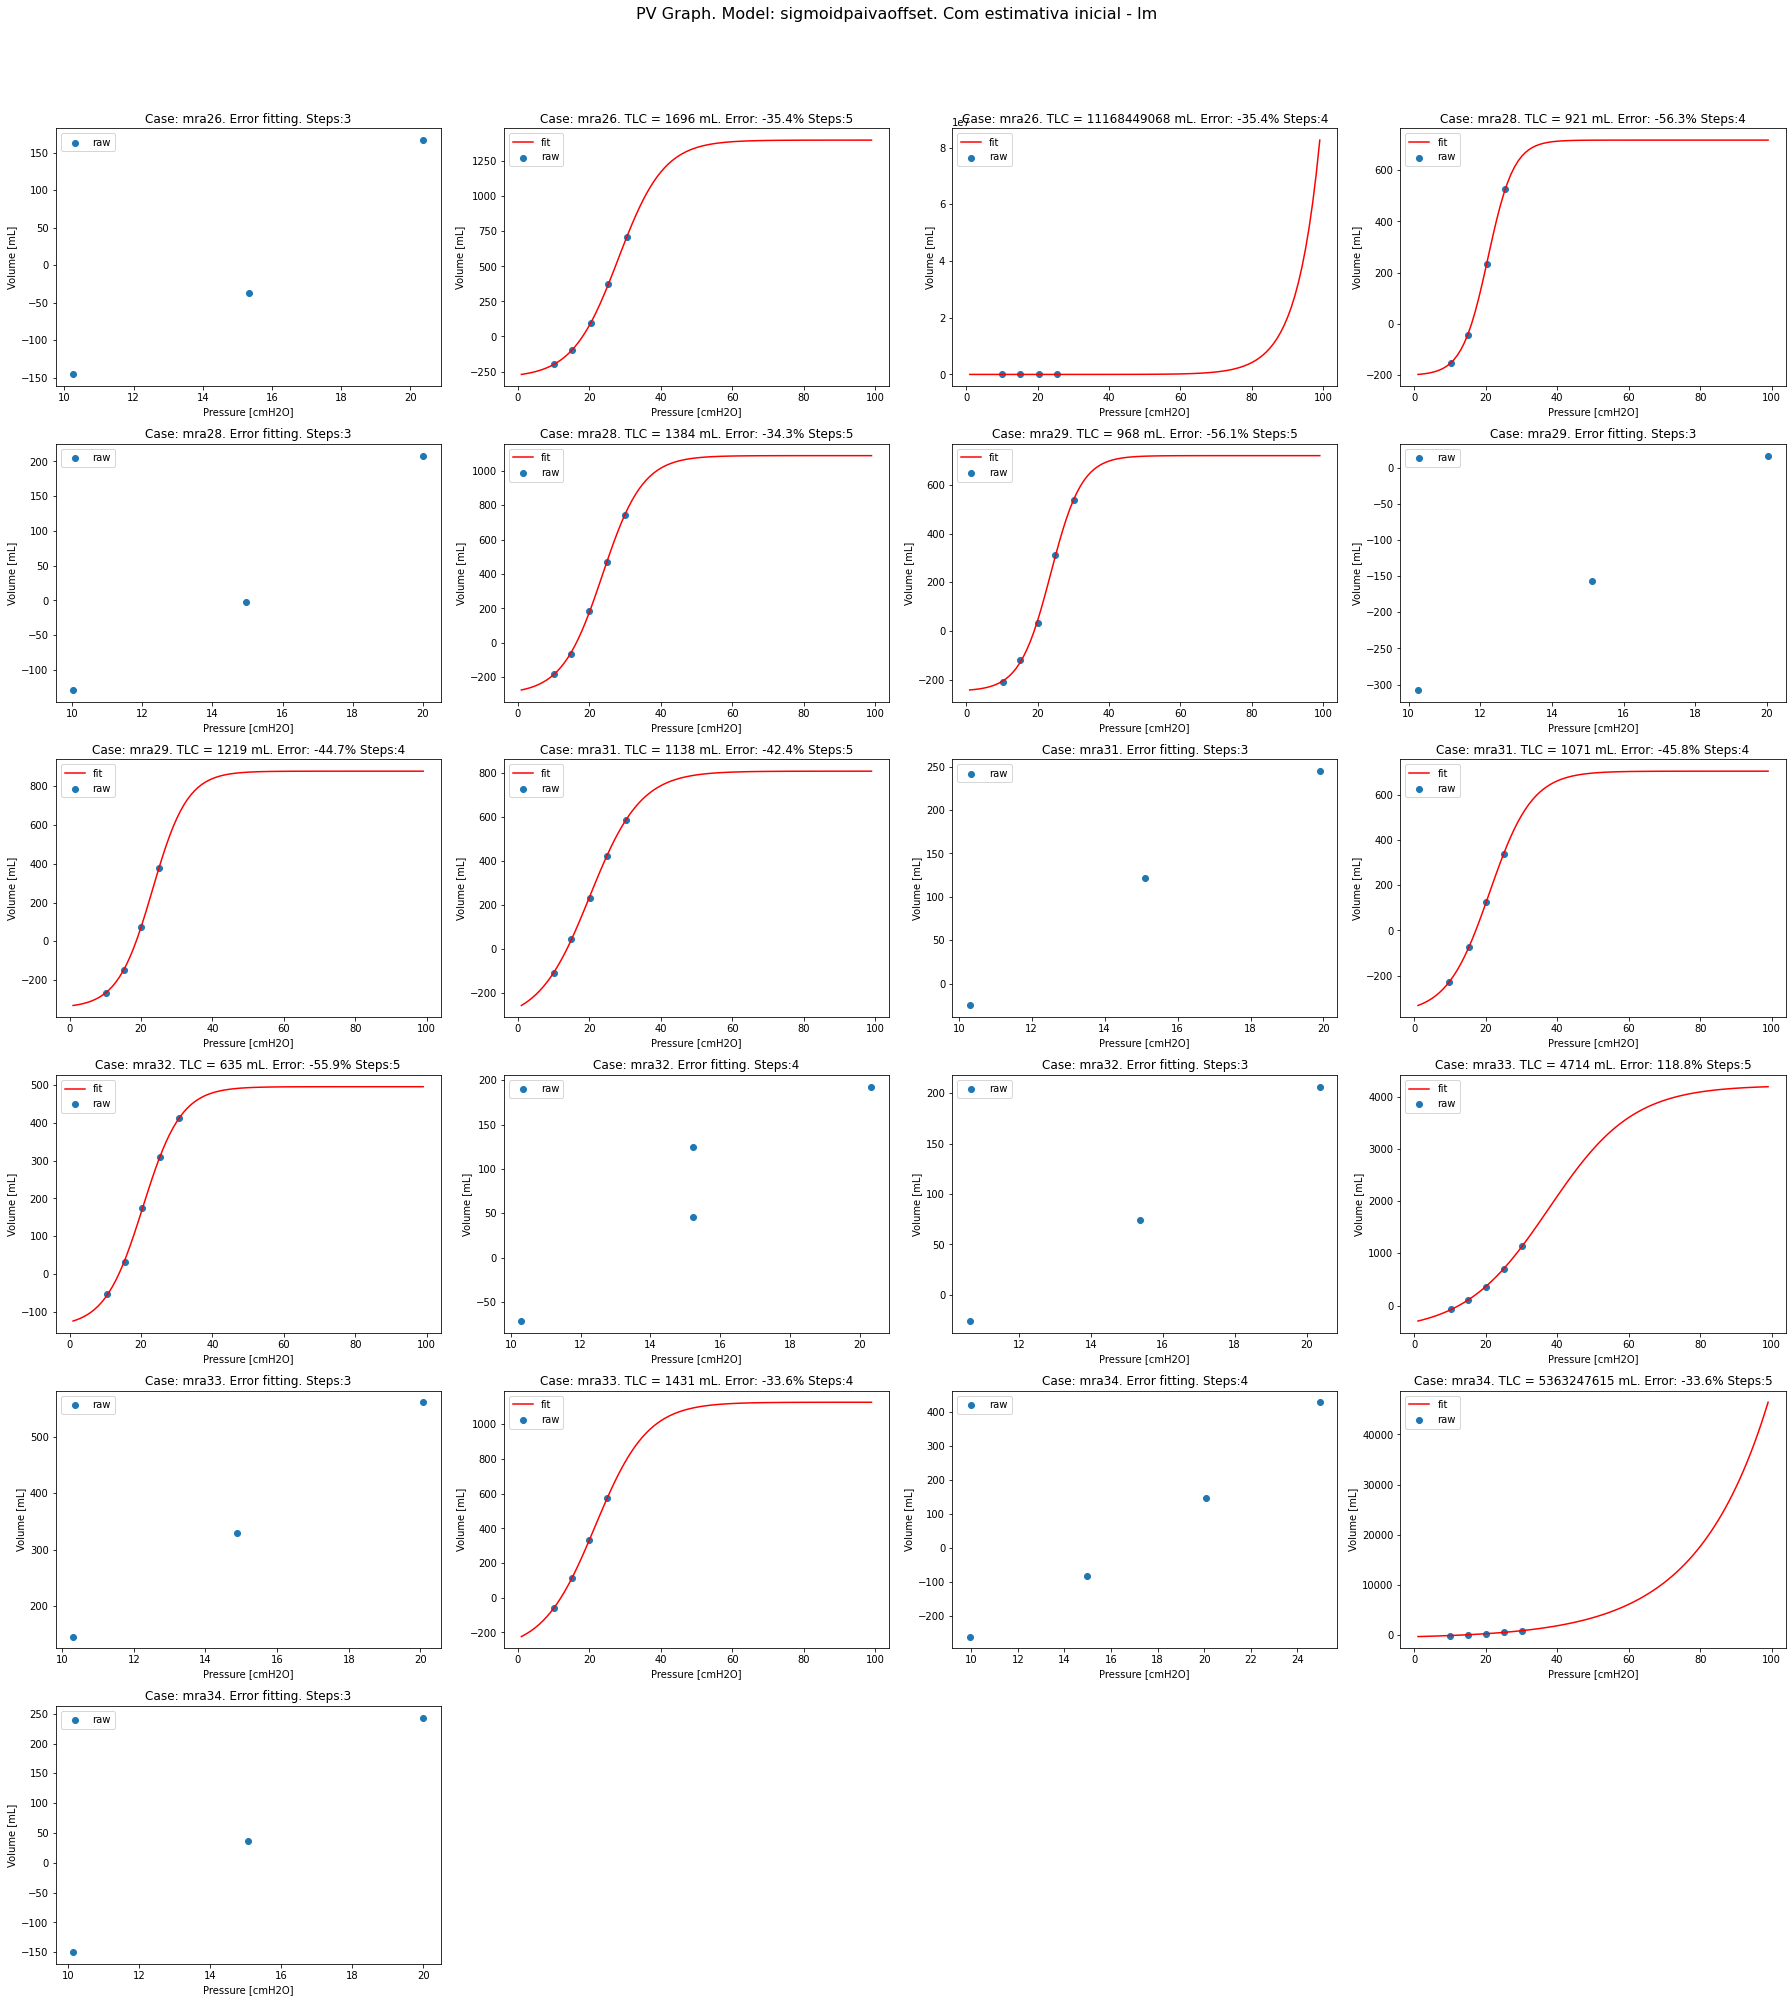

Norma(erro): 181.6. Erro médio: 52.31%. Ajustados: 10.


In [52]:
modelo = m.sigmoidpaivaoffset
metodo = 'lm'
texto = 'Com estimativa inicial - lm'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 = [  2000,   0.01, 0.05,   -200]
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidpaivaoffset - Com estimativa inicial, com condições de contorno.
#### Método dogbox

Testando caso 0: mra26: [ 1999.8 0.053 0.162  -240.3 ]
Testando caso 1: mra26: [ 1695.6 0.048 0.156  -294.7 ]
Testando caso 2: mra26: [ 3500.0 0.132 0.191  -188.2 ]
Testando caso 3: mra28: [  921.0 0.320 0.276  -202.9 ]
Testando caso 4: mra28: [ 1998.4 0.024 0.137  -280.9 ]
	Caso 5 (mra28) deu erro... Steps:5
Testando caso 6: mra29: [  968.3 0.241 0.230  -247.6 ]
Testando caso 7: mra29: [  812.5 0.024 0.177  -500.0 ]
Testando caso 8: mra29: [ 1219.1 0.095 0.205  -342.9 ]
Testando caso 9: mra31: [ 1137.7 0.015 0.140  -327.8 ]
Testando caso 10: mra31: [ 1433.8 0.003 0.071  -500.0 ]
Testando caso 11: mra31: [ 1070.9 0.032 0.168  -367.2 ]
Testando caso 12: mra32: [  634.8 0.074 0.187  -139.8 ]
Testando caso 13: mra32: [  500.0 1.000 0.000  -500.0 ]
Testando caso 14: mra32: [ 1995.6 0.007 0.075  -316.9 ]
Testando caso 15: mra33: [ 3500.0 0.007 0.101  -420.1 ]
Testando caso 16: mra33: [ 1958.4 0.003 0.092  -427.7 ]
Testando caso 17: mra33: [ 1431.4 0.013 0.137  -303.9 ]
Testando caso 18: mra

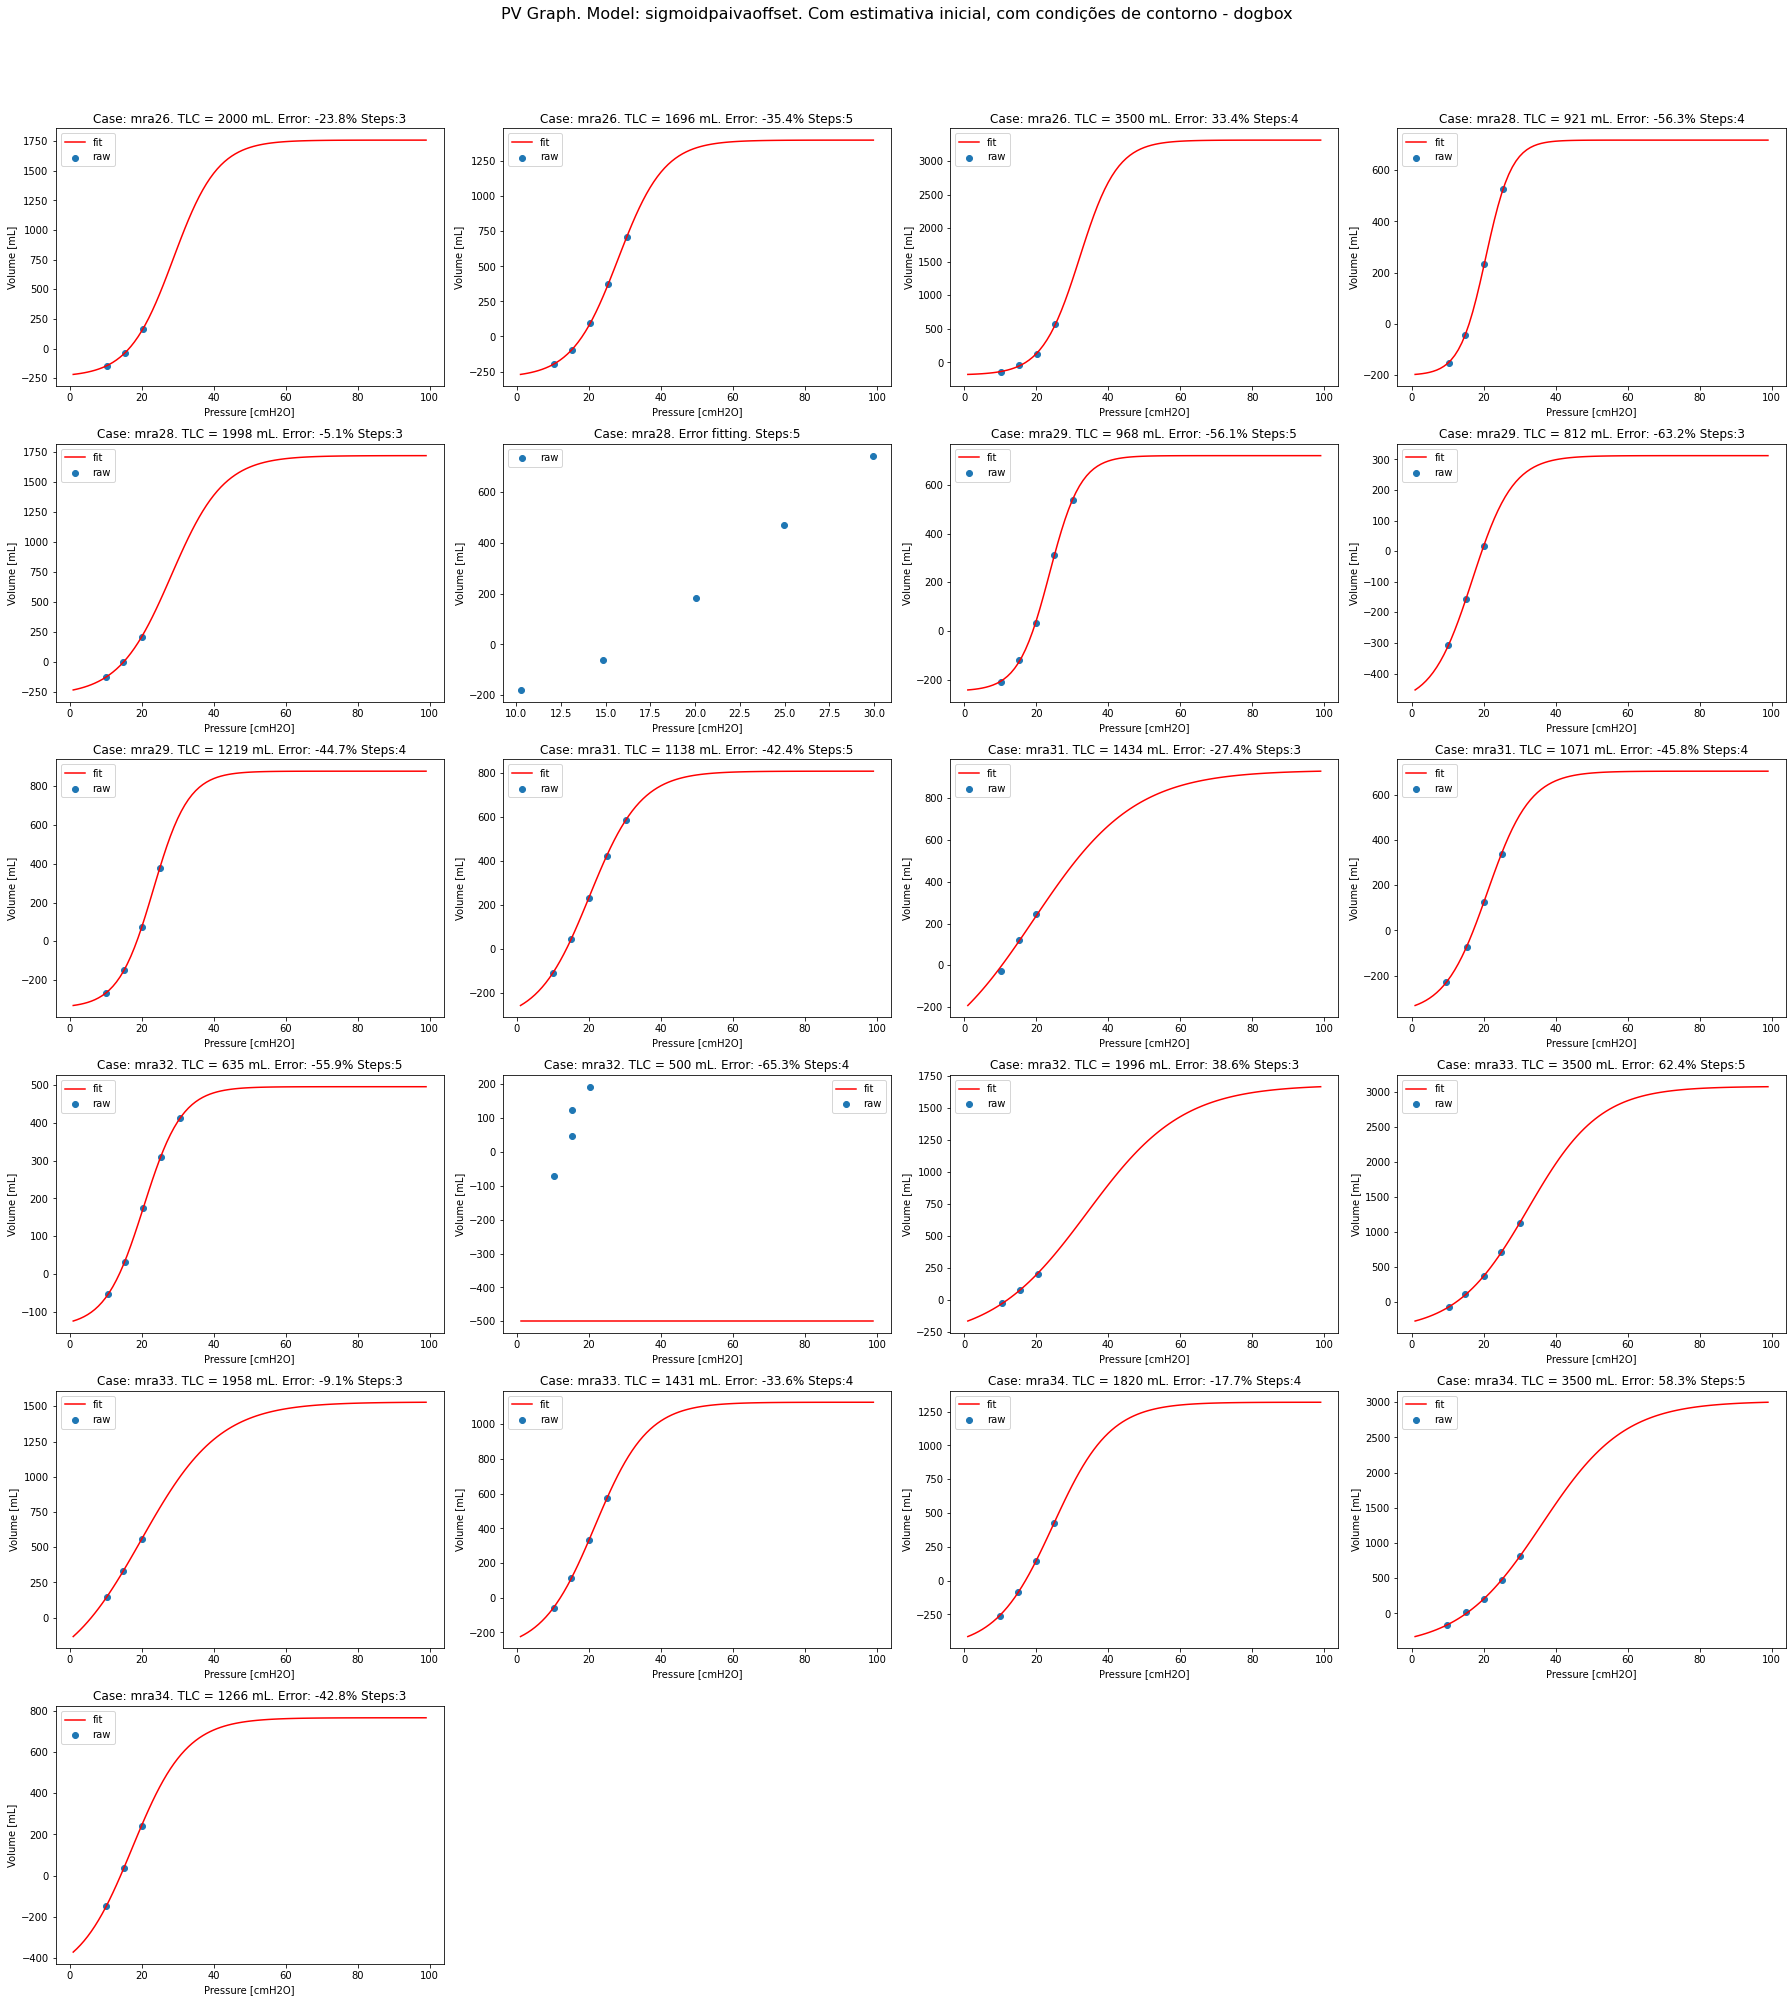

Norma(erro): 198.6. Erro médio: 40.85%. Ajustados: 20.


In [53]:
modelo = m.sigmoidpaivaoffset
metodo = 'dogbox'
texto = 'Com estimativa inicial, com condições de contorno - dogbox'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  2000,   0.01, 0.05,   -200]
meus_bounds = ([  Vmin,      0,    0,   -500],
              [  Vmax,      1,   40,    500])
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidpaivaoffset - Com estimativa inicial, com condições de contorno.
#### Método trf

Testando caso 0: mra26: [ 3500.0 0.041 0.146  -251.1 ]
Testando caso 1: mra26: [ 1695.6 0.048 0.156  -294.7 ]
Testando caso 2: mra26: [ 3500.0 0.132 0.191  -188.2 ]
Testando caso 3: mra28: [  921.0 0.320 0.276  -202.9 ]
Testando caso 4: mra28: [ 2978.2 0.019 0.122  -298.4 ]
Testando caso 5: mra28: [ 1384.2 0.048 0.177  -297.5 ]
Testando caso 6: mra29: [  968.3 0.241 0.230  -247.6 ]
Testando caso 7: mra29: [  808.4 0.025 0.178  -498.6 ]
Testando caso 8: mra29: [ 1219.1 0.095 0.205  -342.9 ]
Testando caso 9: mra31: [ 1137.7 0.015 0.140  -327.8 ]
Testando caso 10: mra31: [  915.3 0.005 0.138  -467.6 ]
Testando caso 11: mra31: [ 1070.9 0.032 0.168  -367.2 ]
Testando caso 12: mra32: [  634.8 0.074 0.187  -139.8 ]
Testando caso 13: mra32: [  500.0 1.000 0.000  -500.0 ]
Testando caso 14: mra32: [ 1123.0 0.012 0.106  -239.8 ]
Testando caso 15: mra33: [ 3499.4 0.008 0.101  -409.1 ]
Testando caso 16: mra33: [ 1632.9 0.005 0.109  -326.3 ]
Testando caso 17: mra33: [ 1431.4 0.013 0.137  -303.9 ]
Te

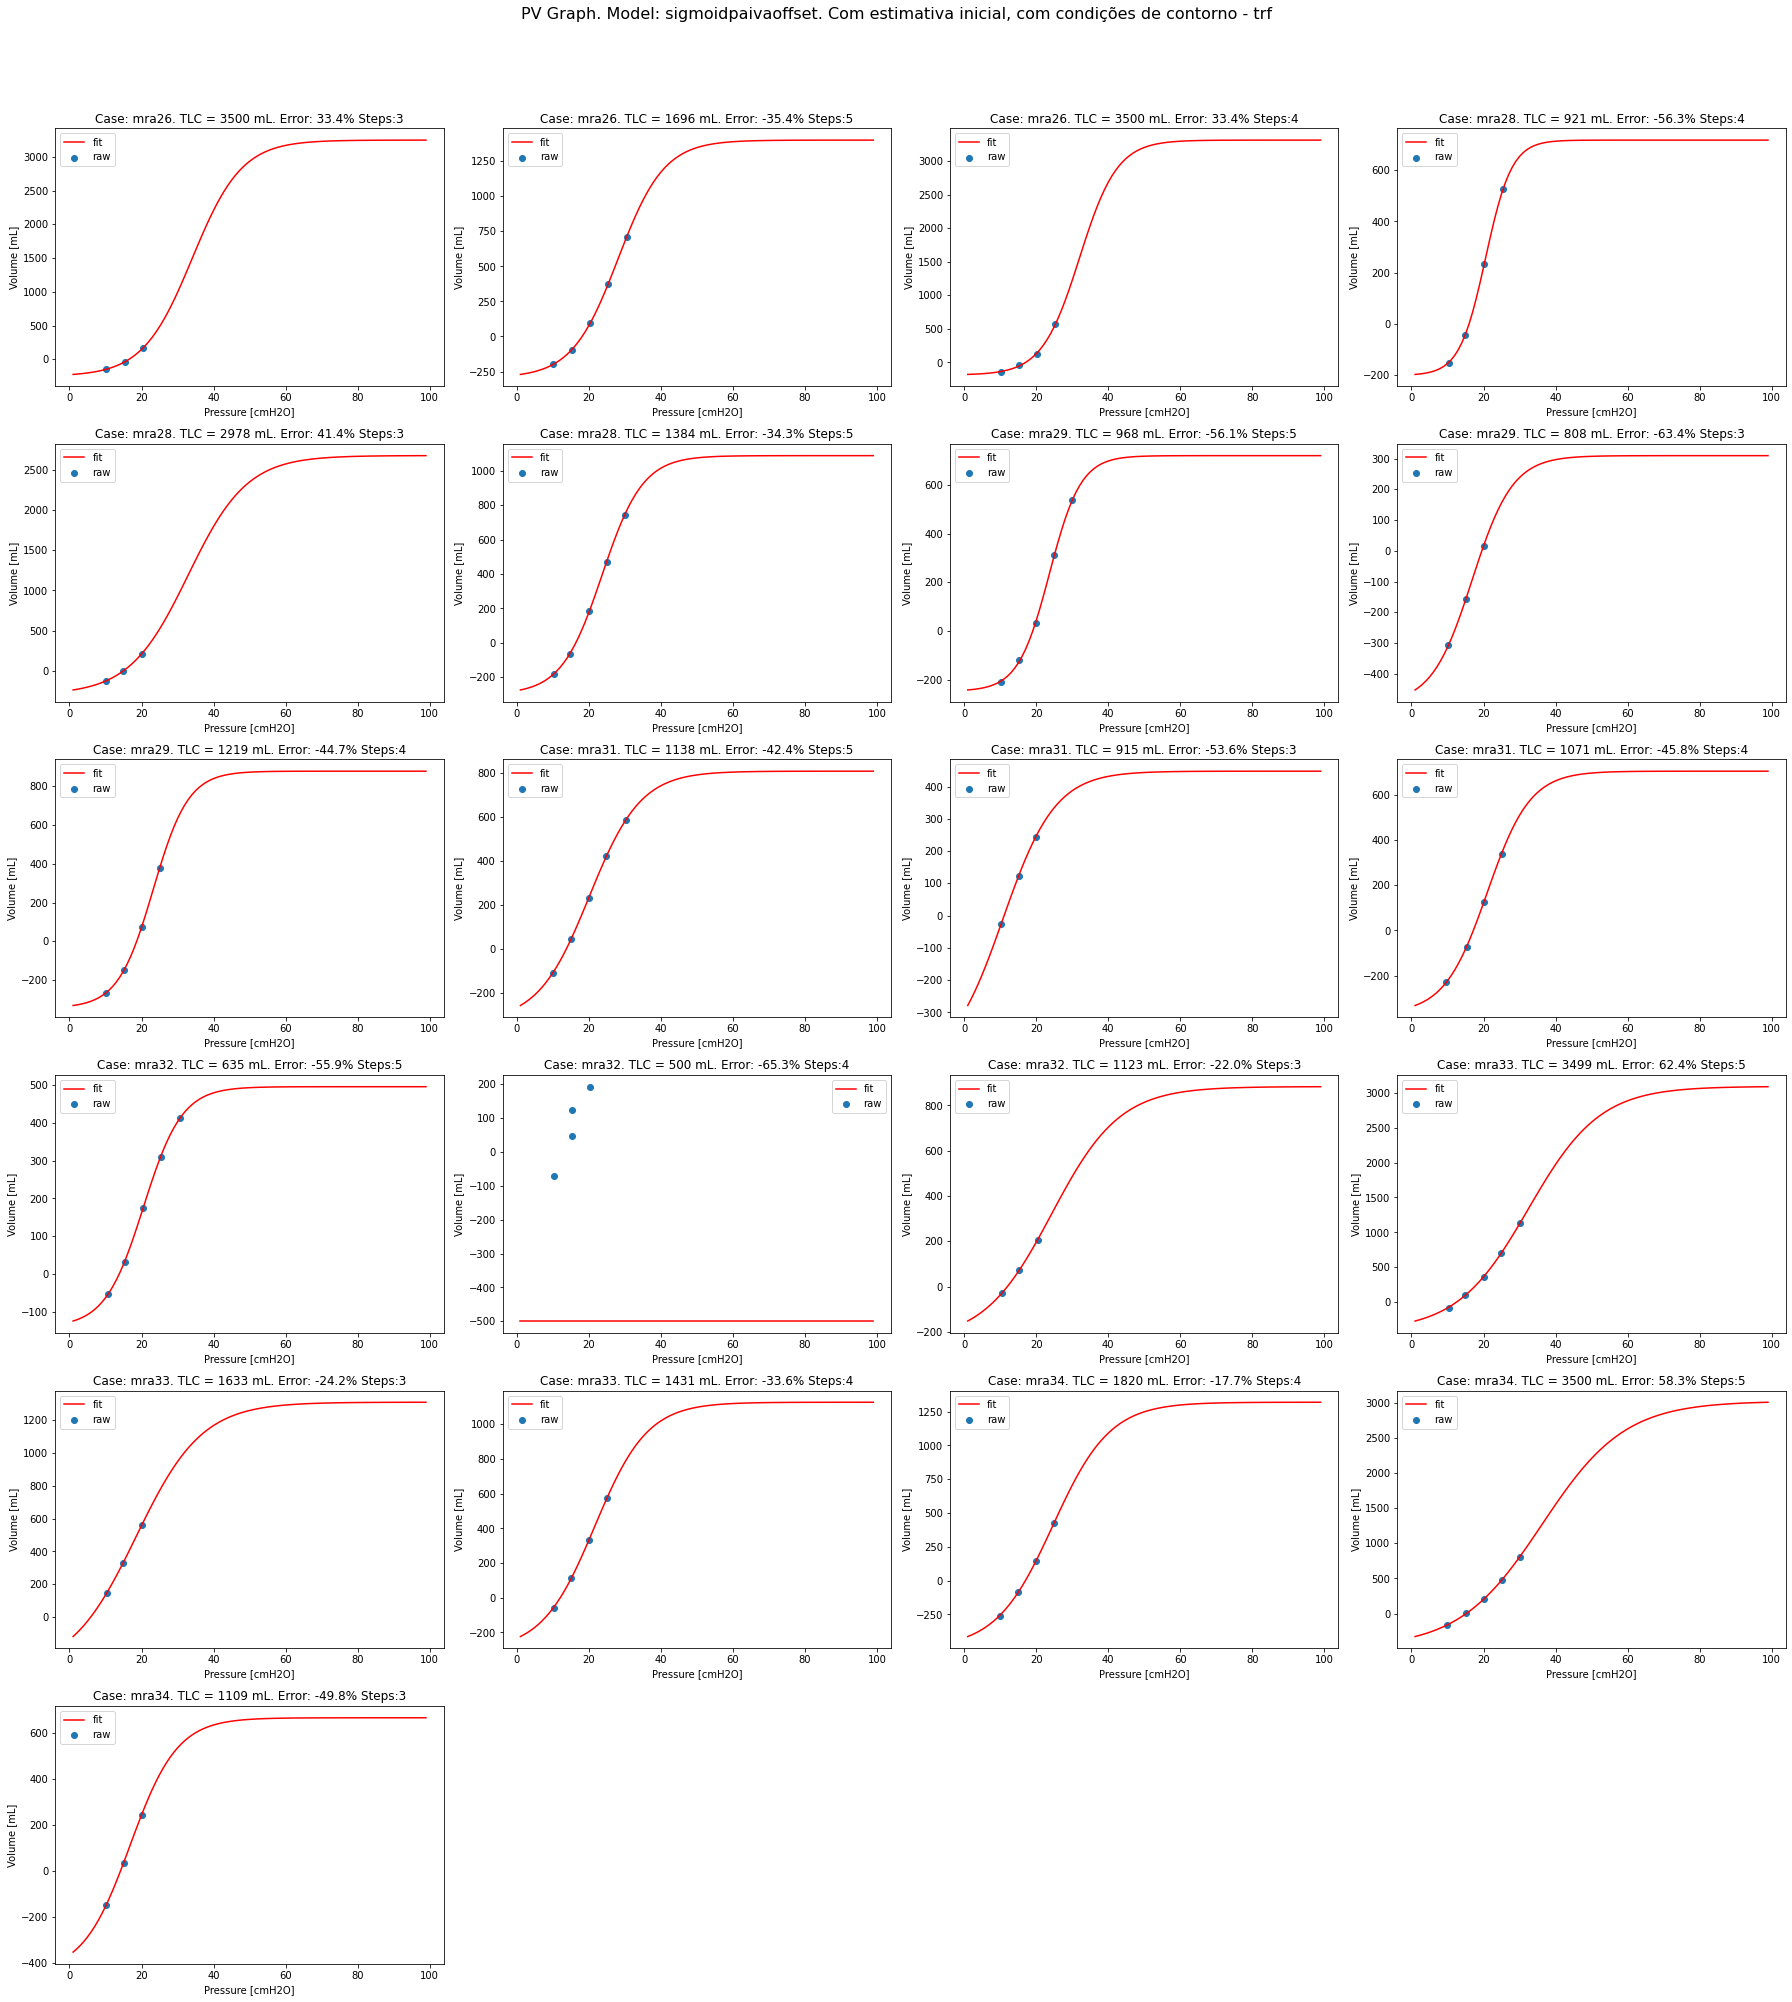

Norma(erro): 212.5. Erro médio: 44.26%. Ajustados: 21.


In [54]:
modelo = m.sigmoidpaivaoffset
metodo = 'trf'
texto = 'Com estimativa inicial, com condições de contorno - trf'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  2000,   0.01, 0.05,   -200]
meus_bounds = ([  Vmin,      0,    0,   -500],
              [  Vmax,      1,   40,    500])
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas2offset - Com estimativa inicial
#### Método lm

	Caso 0 (mra26) deu erro... Steps:3
	Caso 1 (mra26) deu erro... Steps:5
	Caso 2 (mra26) deu erro... Steps:4
	Caso 3 (mra28) deu erro... Steps:4
	Caso 4 (mra28) deu erro... Steps:3
	Caso 5 (mra28) deu erro... Steps:5
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
	Caso 9 (mra31) deu erro... Steps:5
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
	Caso 12 (mra32) deu erro... Steps:5
	Caso 13 (mra32) deu erro... Steps:4
	Caso 14 (mra32) deu erro... Steps:3
	Caso 15 (mra33) deu erro... Steps:5
	Caso 16 (mra33) deu erro... Steps:3
	Caso 17 (mra33) deu erro... Steps:4
	Caso 18 (mra34) deu erro... Steps:4
	Caso 19 (mra34) deu erro... Steps:5
	Caso 20 (mra34) deu erro... Steps:3


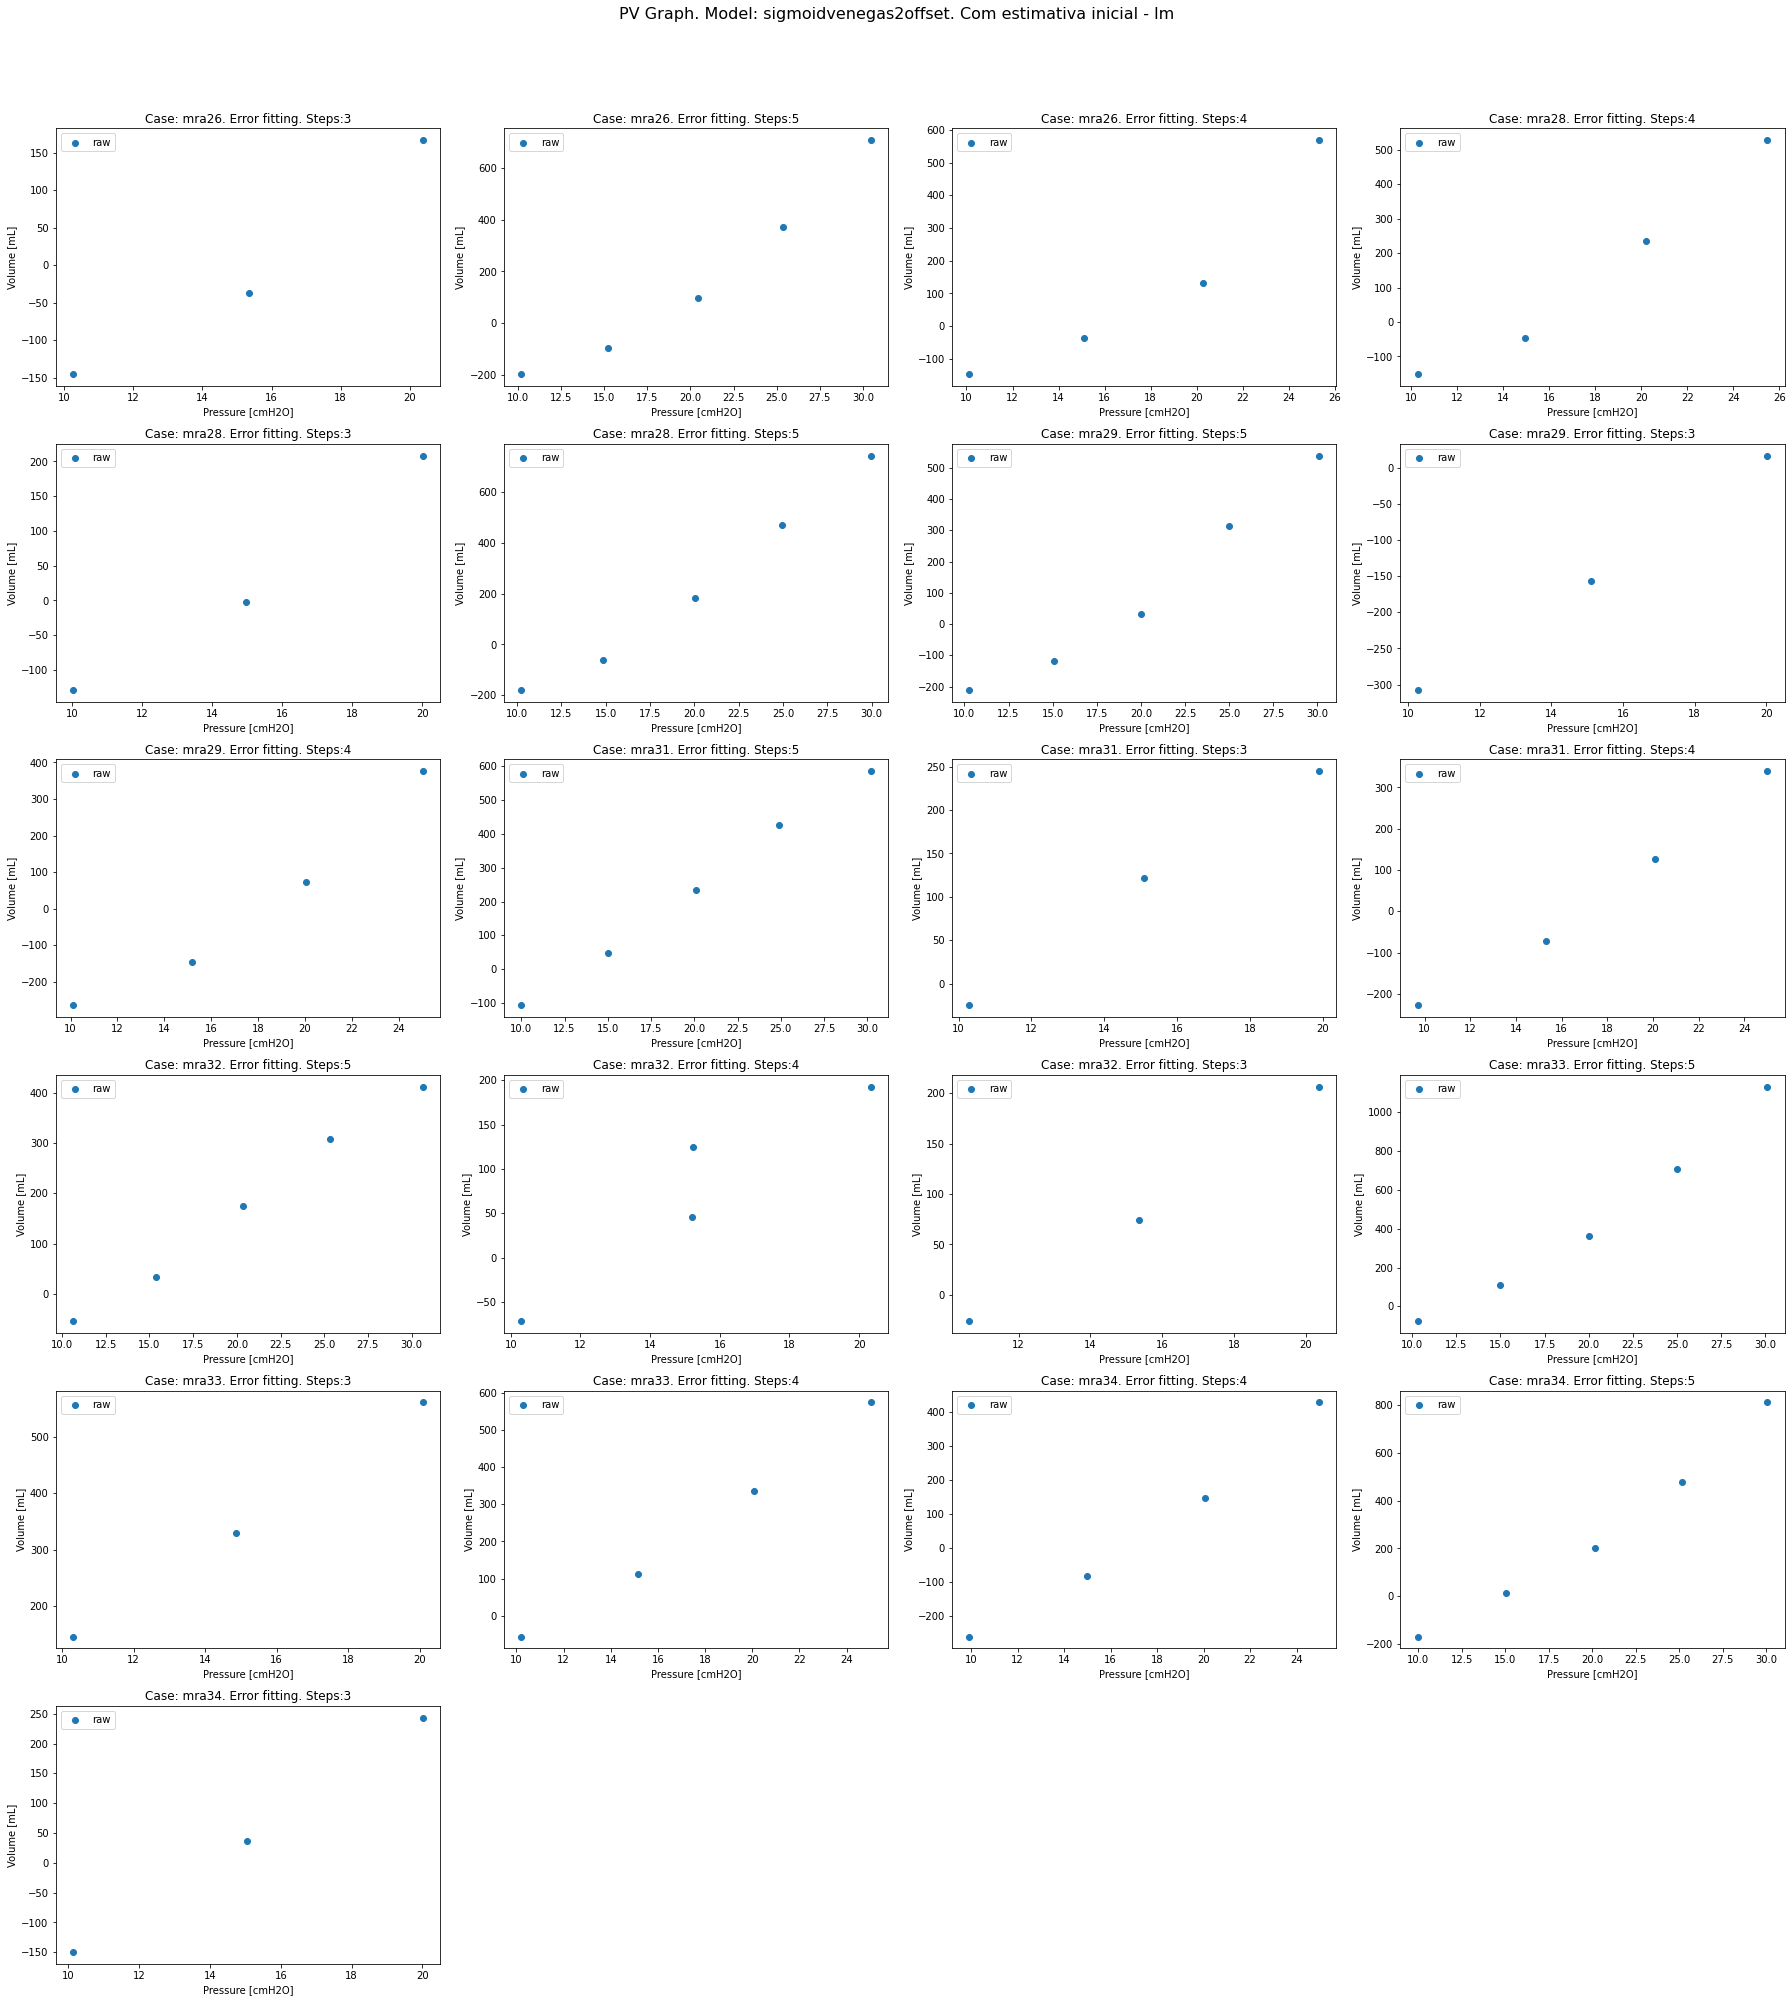

Norma(erro): -1.0. Erro médio: -1.00%. Ajustados: 0.


In [55]:
modelo = m.sigmoidvenegas2offset
metodo = 'lm'
texto = 'Com estimativa inicial - lm'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 = [  2000,     0.01,    0.05,      10,       1,    -300]
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas2offset - Com estimativa inicial, com condições de contorno.
#### Método dogbox

Testando caso 0: mra26: [ 1998.3     3.9 0.045    28.8     6.2  -240.2 ]
	Caso 1 (mra26) deu erro... Steps:5
Testando caso 2: mra26: [ 3500.0  3654.9 0.008    10.2 0.001  -120.7 ]
Testando caso 3: mra28: [ 1847.5   404.1 -0.028    21.9     3.7  -207.6 ]
Testando caso 4: mra28: [ 1997.9     3.9 0.828    28.2     7.3  -280.9 ]
	Caso 5 (mra28) deu erro... Steps:5
Testando caso 6: mra29: [  500.0  2000.0   465.9 0.000 -0.365   115.0 ]
Testando caso 7: mra29: [ 1996.9     2.4 -0.326    16.2 0.449  -307.4 ]
Testando caso 8: mra29: [ 1820.0   667.5 0.003    23.1     4.9  -342.4 ]
Testando caso 9: mra31: [ 1137.7  2000.0  1706.6    20.1     7.1  -327.8 ]
Testando caso 10: mra31: [ 1997.3     4.0 -0.233    25.2     8.3  -302.7 ]
Testando caso 11: mra31: [ 1683.2   698.6 0.004    20.7     5.9  -365.2 ]
Testando caso 12: mra32: [  634.8  1213.8  2000.0    20.6     5.3  -139.8 ]
Testando caso 13: mra32: [  500.0  2000.0   186.8    25.3 0.641 -5000.0 ]
Testando caso 14: mra32: [ 1997.1     6.1 -0.0

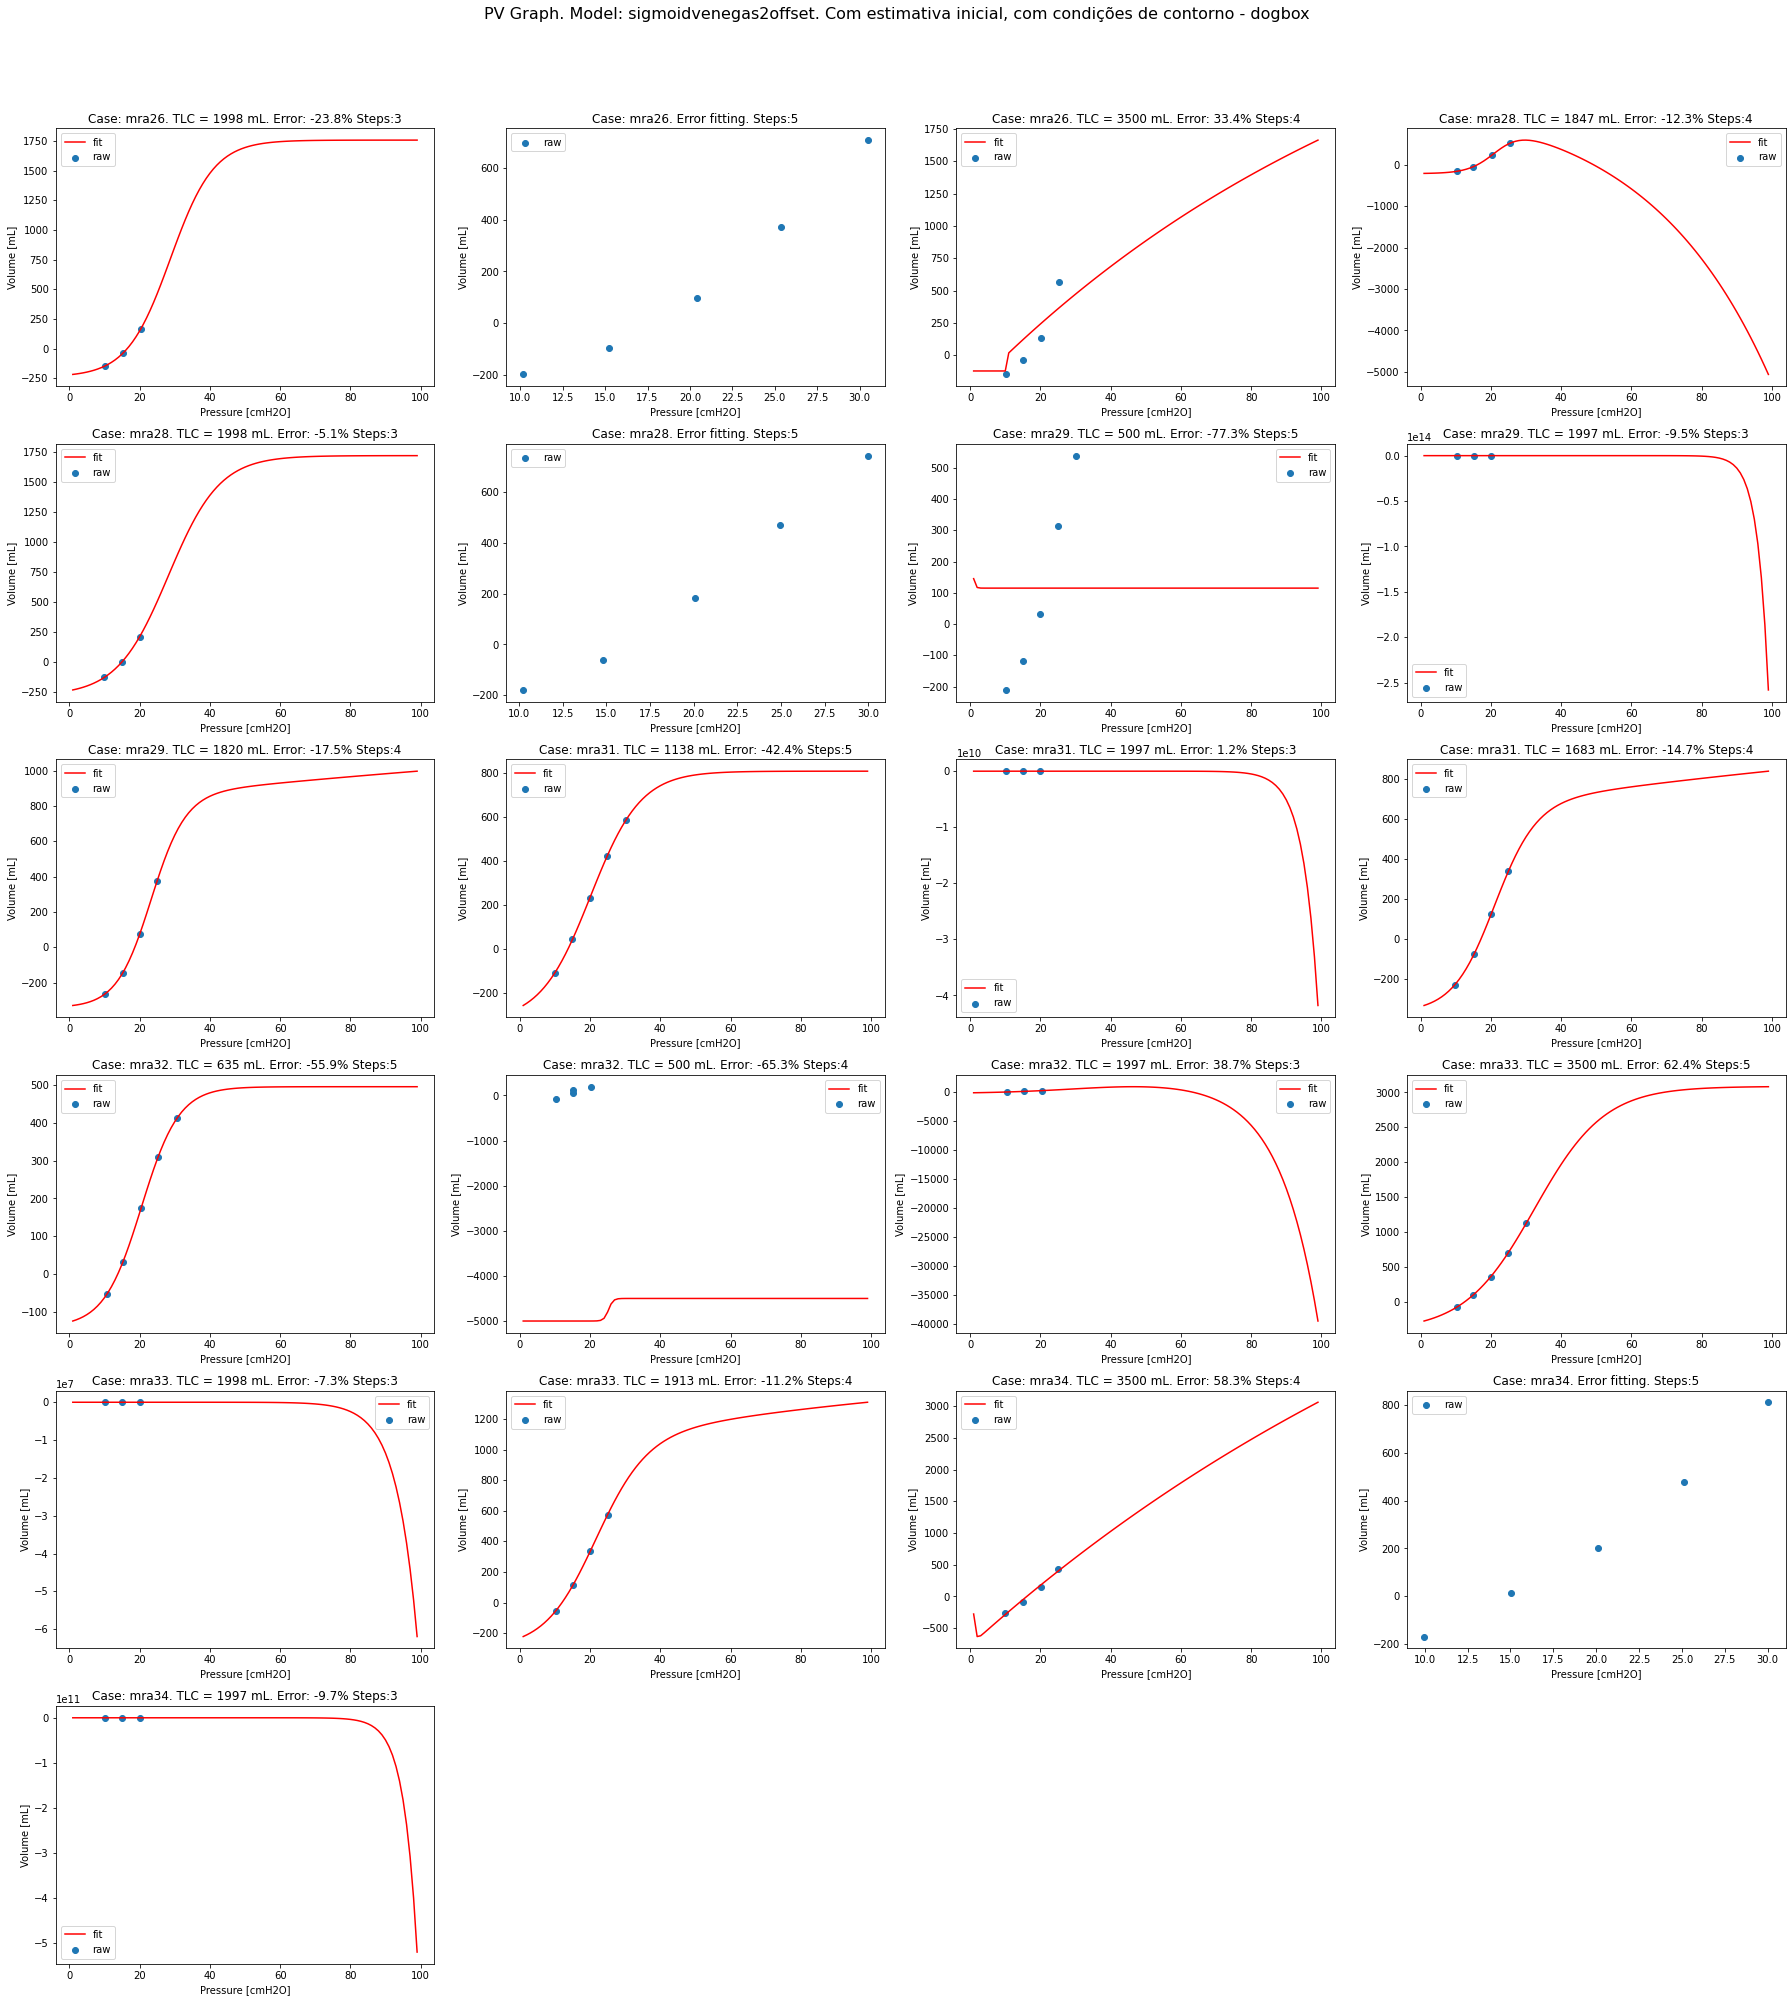

Norma(erro): 163.4. Erro médio: 30.33%. Ajustados: 18.


In [56]:
modelo = m.sigmoidvenegas2offset
metodo = 'dogbox'
texto = 'Com estimativa inicial, com condições de contorno - dogbox'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  2000,     0.01,    0.05,      10,       1,    -300]
meus_bounds = ([  Vmin,  -np.inf, -np.inf,       0, -np.inf,   -5000 ],
              [  Vmax,   np.inf,  np.inf,      40,  np.inf,    5000 ])
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas2offset - Com estimativa inicial, com condições de contorno.
#### Método trf

Testando caso 0: mra26: [ 1820.4   105.1    16.1    27.9     6.0  -237.8 ]
Testando caso 1: mra26: [ 1695.6  -136.4     4.4    28.1     6.4  -294.7 ]
Testando caso 2: mra26: [ 3500.0  -644.3   255.9    32.1     5.2  -188.2 ]
Testando caso 3: mra28: [  921.0   109.4   282.9    20.6     3.6  -202.9 ]
Testando caso 4: mra28: [ 1667.0   209.1   324.8    26.2     6.8  -270.7 ]
Testando caso 5: mra28: [ 1384.2  -353.6    37.1    23.7     5.6  -297.5 ]
Testando caso 6: mra29: [  968.3   195.2    10.9    23.7     4.3  -247.6 ]
Testando caso 7: mra29: [ 1716.1    -9.9     2.0    22.3    11.7  -757.1 ]
Testando caso 8: mra29: [ 1219.1  -523.0    75.7    23.2     4.9  -342.9 ]
Testando caso 9: mra31: [ 1137.7 16062.6    57.0    20.1     7.1  -327.8 ]
Testando caso 10: mra31: [ 1725.7 0.791 -0.175     6.3    12.8 -1019.8 ]
Testando caso 11: mra31: [ 1070.9   372.6     6.4    21.0     6.0  -367.2 ]
	Caso 12 (mra32) deu erro... Steps:5
Testando caso 13: mra32: [  590.5 27886.5 -0.094 0.000    -6.8 -

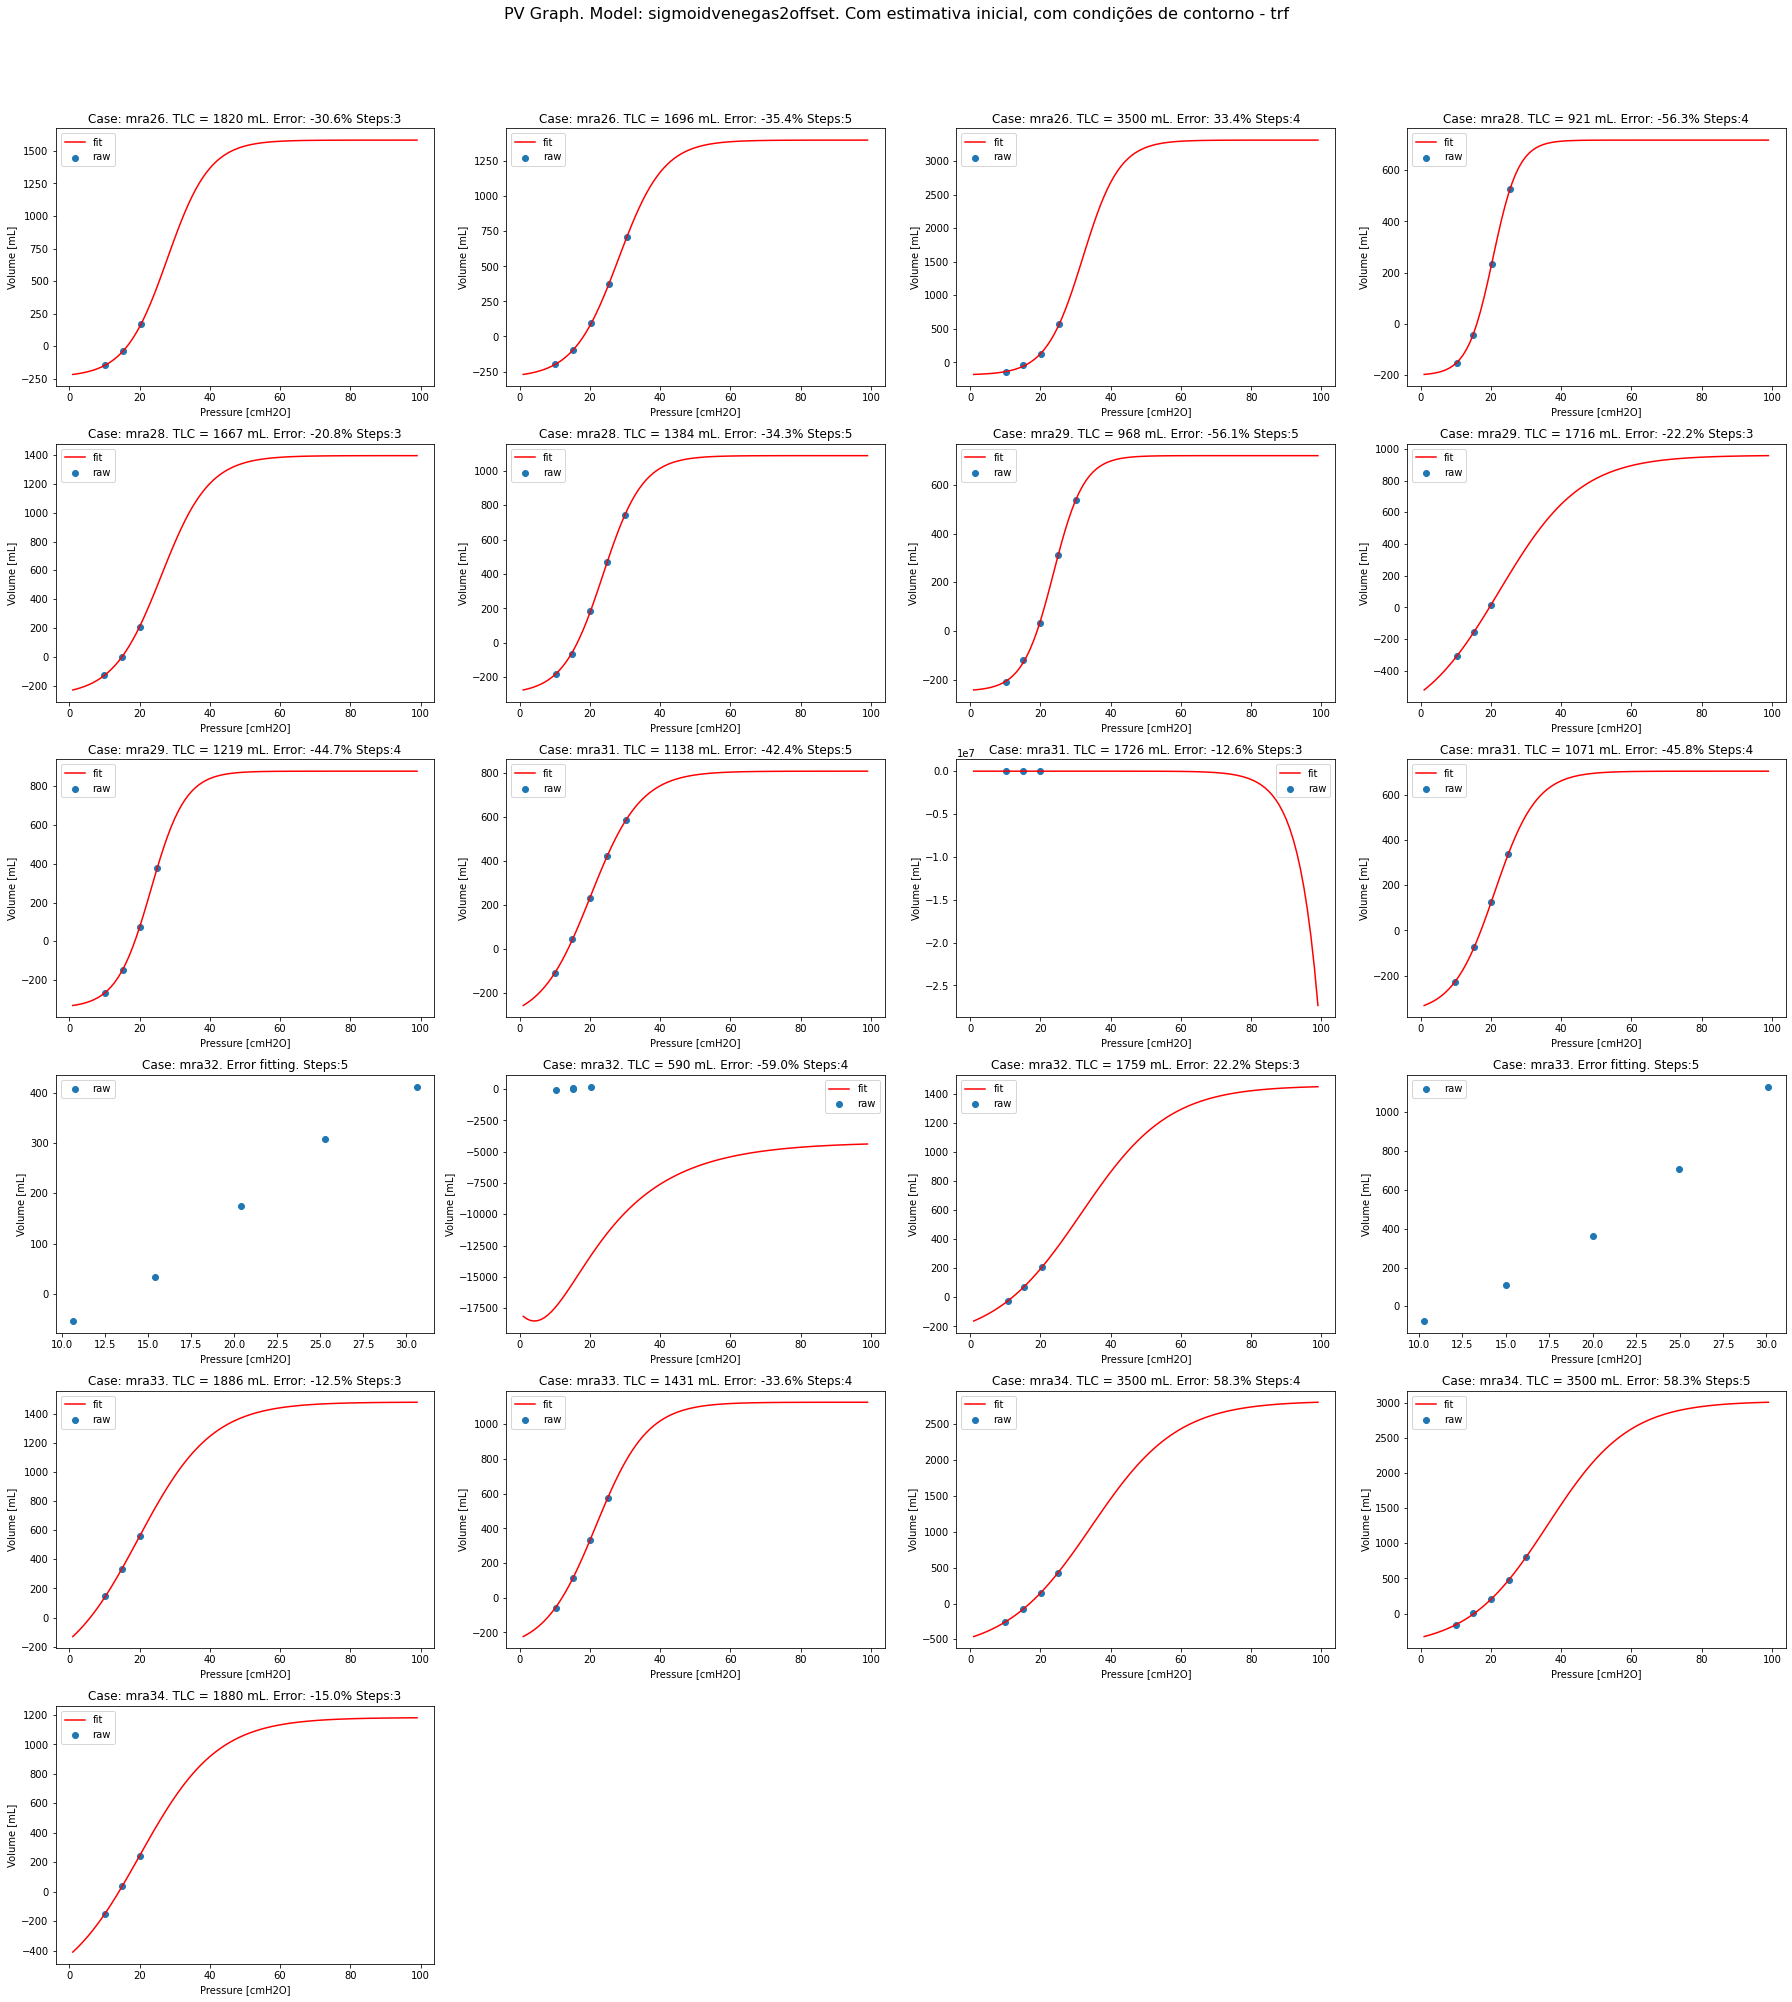

Norma(erro): 173.3. Erro médio: 36.49%. Ajustados: 19.


In [57]:
modelo = m.sigmoidvenegas2offset
metodo = 'trf'
texto = 'Com estimativa inicial, com condições de contorno - trf'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  2000,     0.01,    0.05,      10,       1,    -300]
meus_bounds = ([  Vmin,  -np.inf, -np.inf,       0, -np.inf,   -5000 ],
              [  Vmax,   np.inf,  np.inf,      40,  np.inf,    5000 ])
_, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidmurphy - Com estimativa inicial
#### Método lm

	Caso 0 (mra26) deu erro... Steps:3
	Caso 1 (mra26) deu erro... Steps:5
	Caso 2 (mra26) deu erro... Steps:4
	Caso 3 (mra28) deu erro... Steps:4
	Caso 4 (mra28) deu erro... Steps:3
	Caso 5 (mra28) deu erro... Steps:5
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
Testando caso 9: mra31: [  741.9 -1520.0   816.8 68308.6    57.4 ]
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
Testando caso 12: mra32: [  790.4  -214.4  8477.6  1655.0    10.9 ]
	Caso 13 (mra32) deu erro... Steps:4
	Caso 14 (mra32) deu erro... Steps:3
Testando caso 15: mra33: [ 1396.1 -1484.5   381.9 56810.5    50.4 ]
	Caso 16 (mra33) deu erro... Steps:3
	Caso 17 (mra33) deu erro... Steps:4
	Caso 18 (mra34) deu erro... Steps:4
Testando caso 19: mra34: [-1402.8  -167.6 58572.4 -0.000    56.5 ]
	Caso 20 (mra34) deu erro... Steps:3


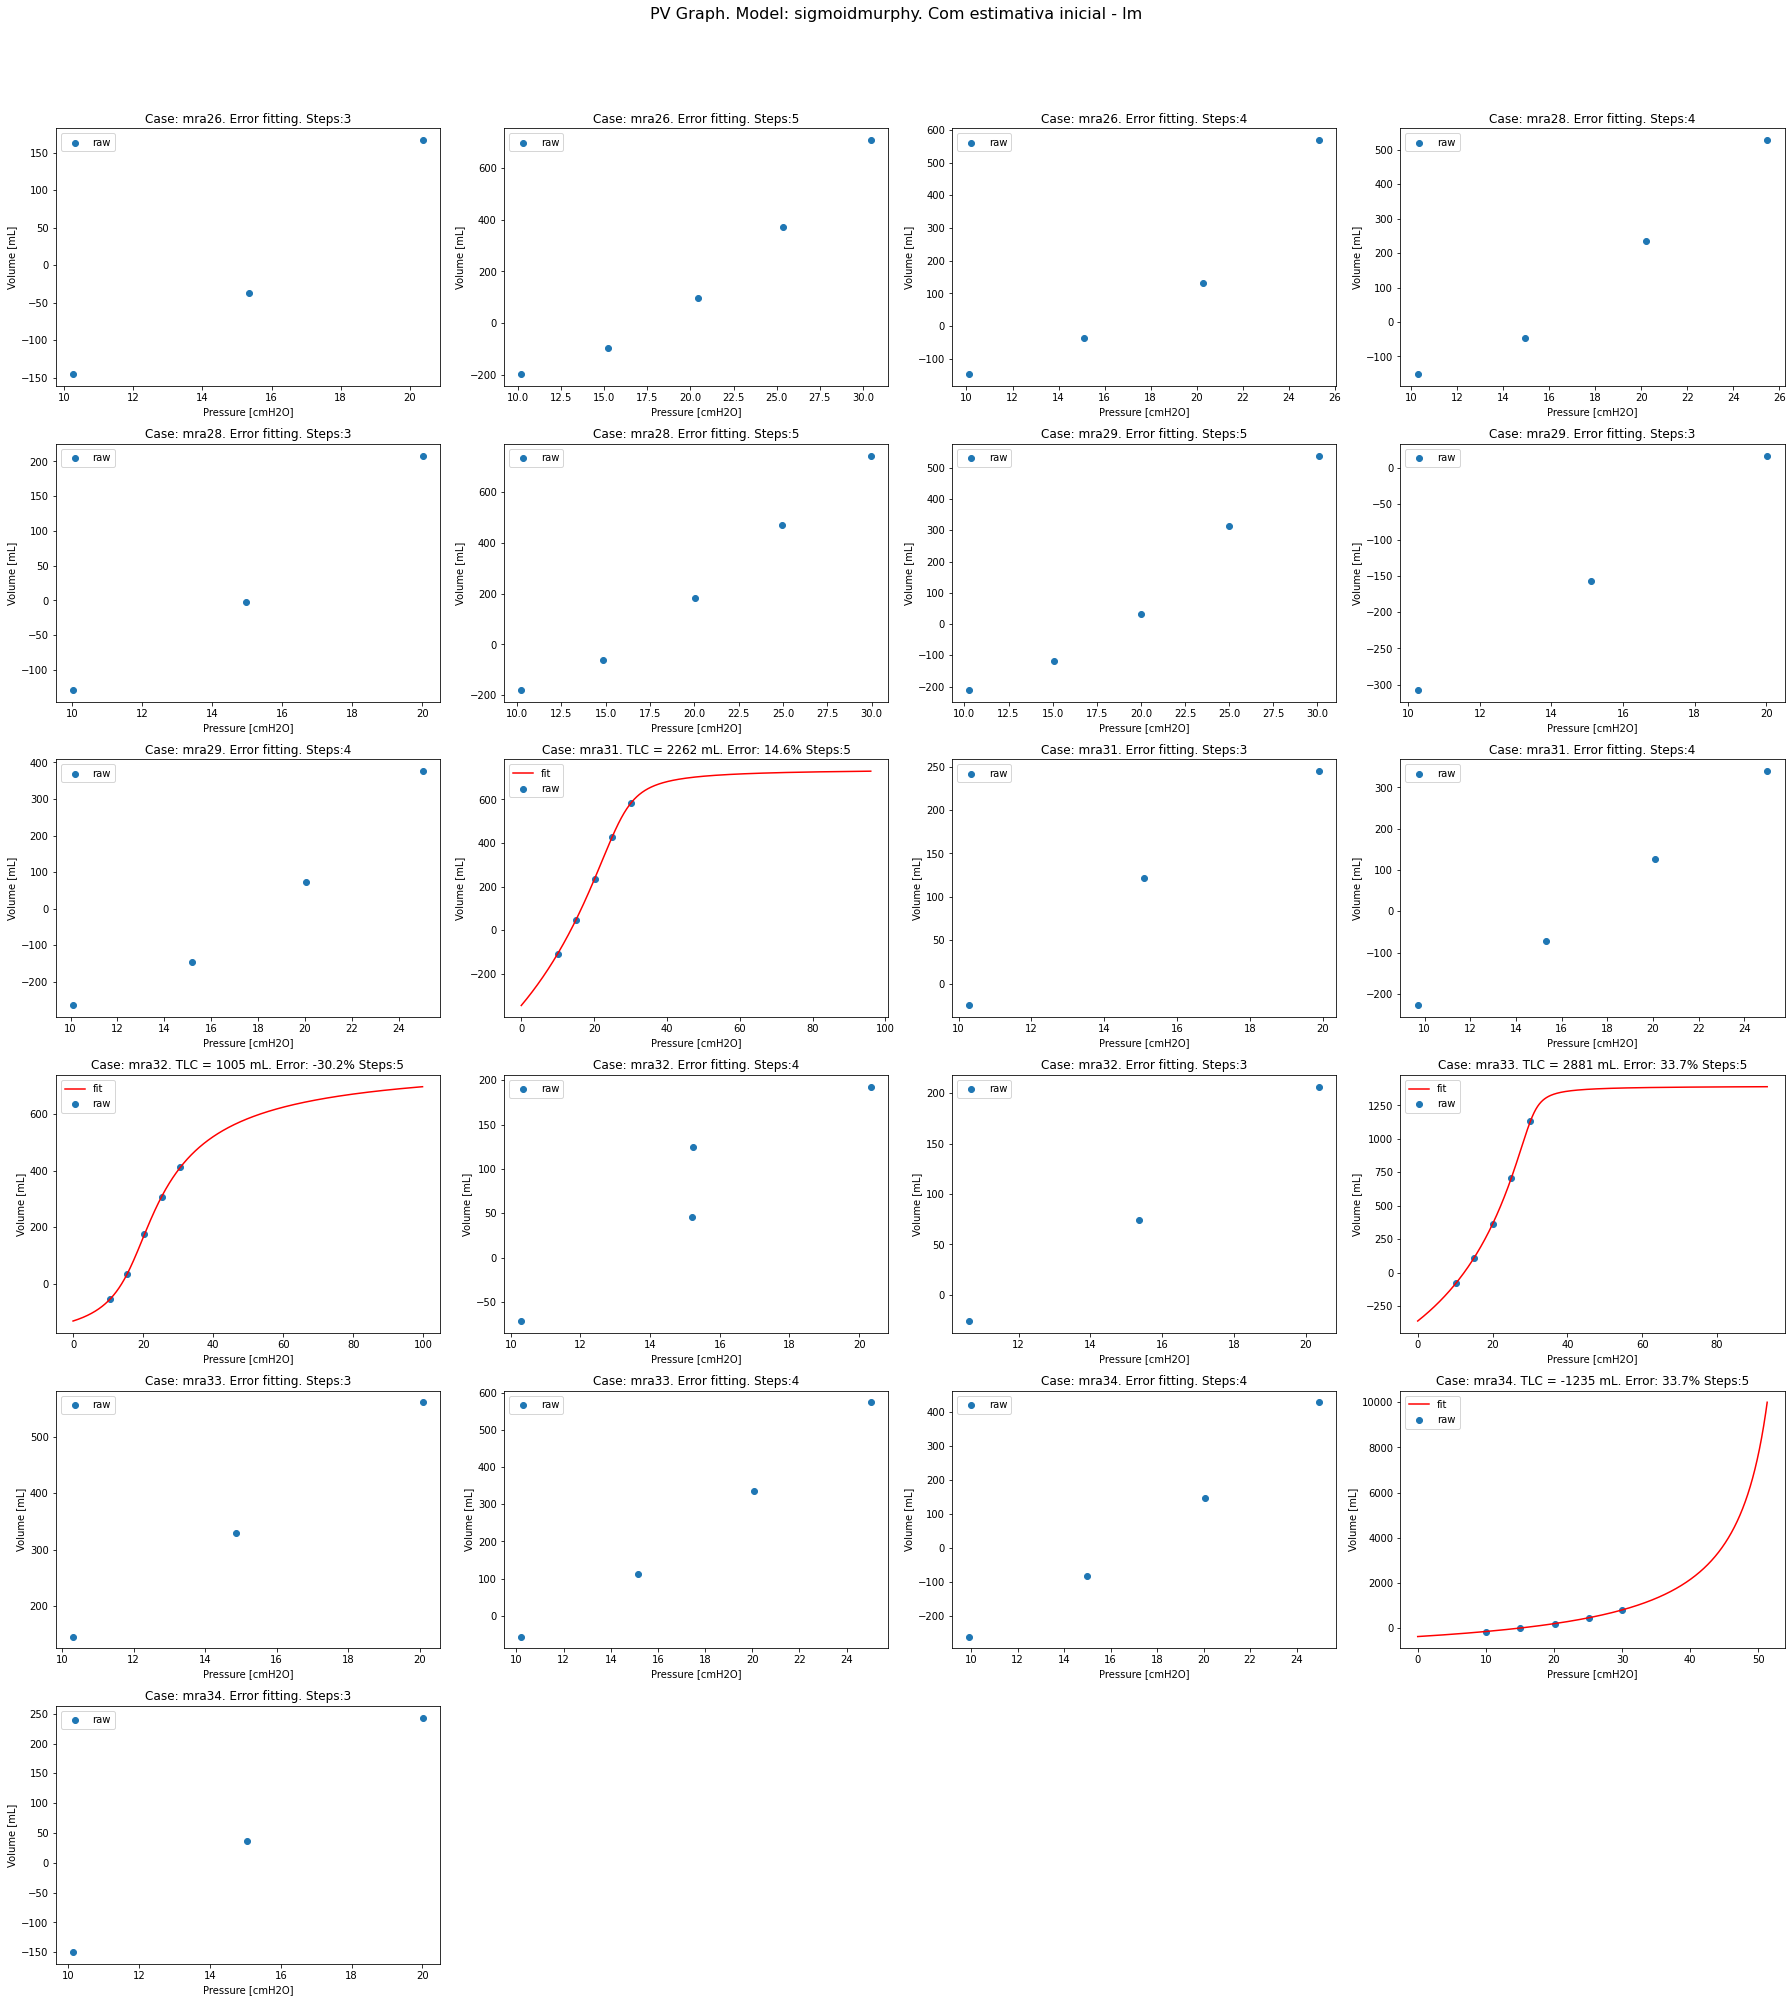

Norma(erro): 47.6. Erro médio: 26.16%. Ajustados: 3.


In [58]:
modelo = m.sigmoidmurphy
metodo = 'lm'
texto = 'Com estimativa inicial - lm'
TLC_index = 0
invert_PV = True
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =  [ 2000.0,  -200.0,  1000.0,  1000.0,    20.0]
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV, df_final=df_final, meu_p0 = meu_p0)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidmurphy - Com estimativa inicial, com condições de contorno.
#### Método dogbox

Testando caso 0: mra26: [ 1125.6  -469.3  1557.8  6404.4    28.8 ]
	Caso 1 (mra26) deu erro... Steps:5
Testando caso 2: mra26: [ 3500.0  -500.0  3601.8  7948.0    31.6 ]
Testando caso 3: mra28: [  843.2  -385.6  2346.0  3164.6    21.5 ]
Testando caso 4: mra28: [  642.2  -474.8  1668.2  5821.1    24.7 ]
Testando caso 5: mra28: [ 2872.4  -391.4 82597.4  2079.0    -7.0 ]
Testando caso 6: mra29: [  500.0  -129.8   100.0   100.0    21.9 ]
	Caso 7 (mra29) deu erro... Steps:3
Testando caso 8: mra29: [ 2200.7  -204.6 100000.0   100.0   -28.5 ]
Testando caso 9: mra31: [ 1350.8  -500.0 19650.3  4908.9     9.0 ]
Testando caso 10: mra31: [  500.0  -399.7  2723.5  3687.7    15.0 ]
	Caso 11 (mra31) deu erro... Steps:4
	Caso 12 (mra32) deu erro... Steps:5
	Caso 13 (mra32) deu erro... Steps:4
Testando caso 14: mra32: [  500.0  -328.1  2024.6  4658.7    22.2 ]
	Caso 15 (mra33) deu erro... Steps:5
Testando caso 16: mra33: [  821.1  -156.3  1796.4  2906.7    17.2 ]
	Caso 17 (mra33) deu erro... Steps:4
	C

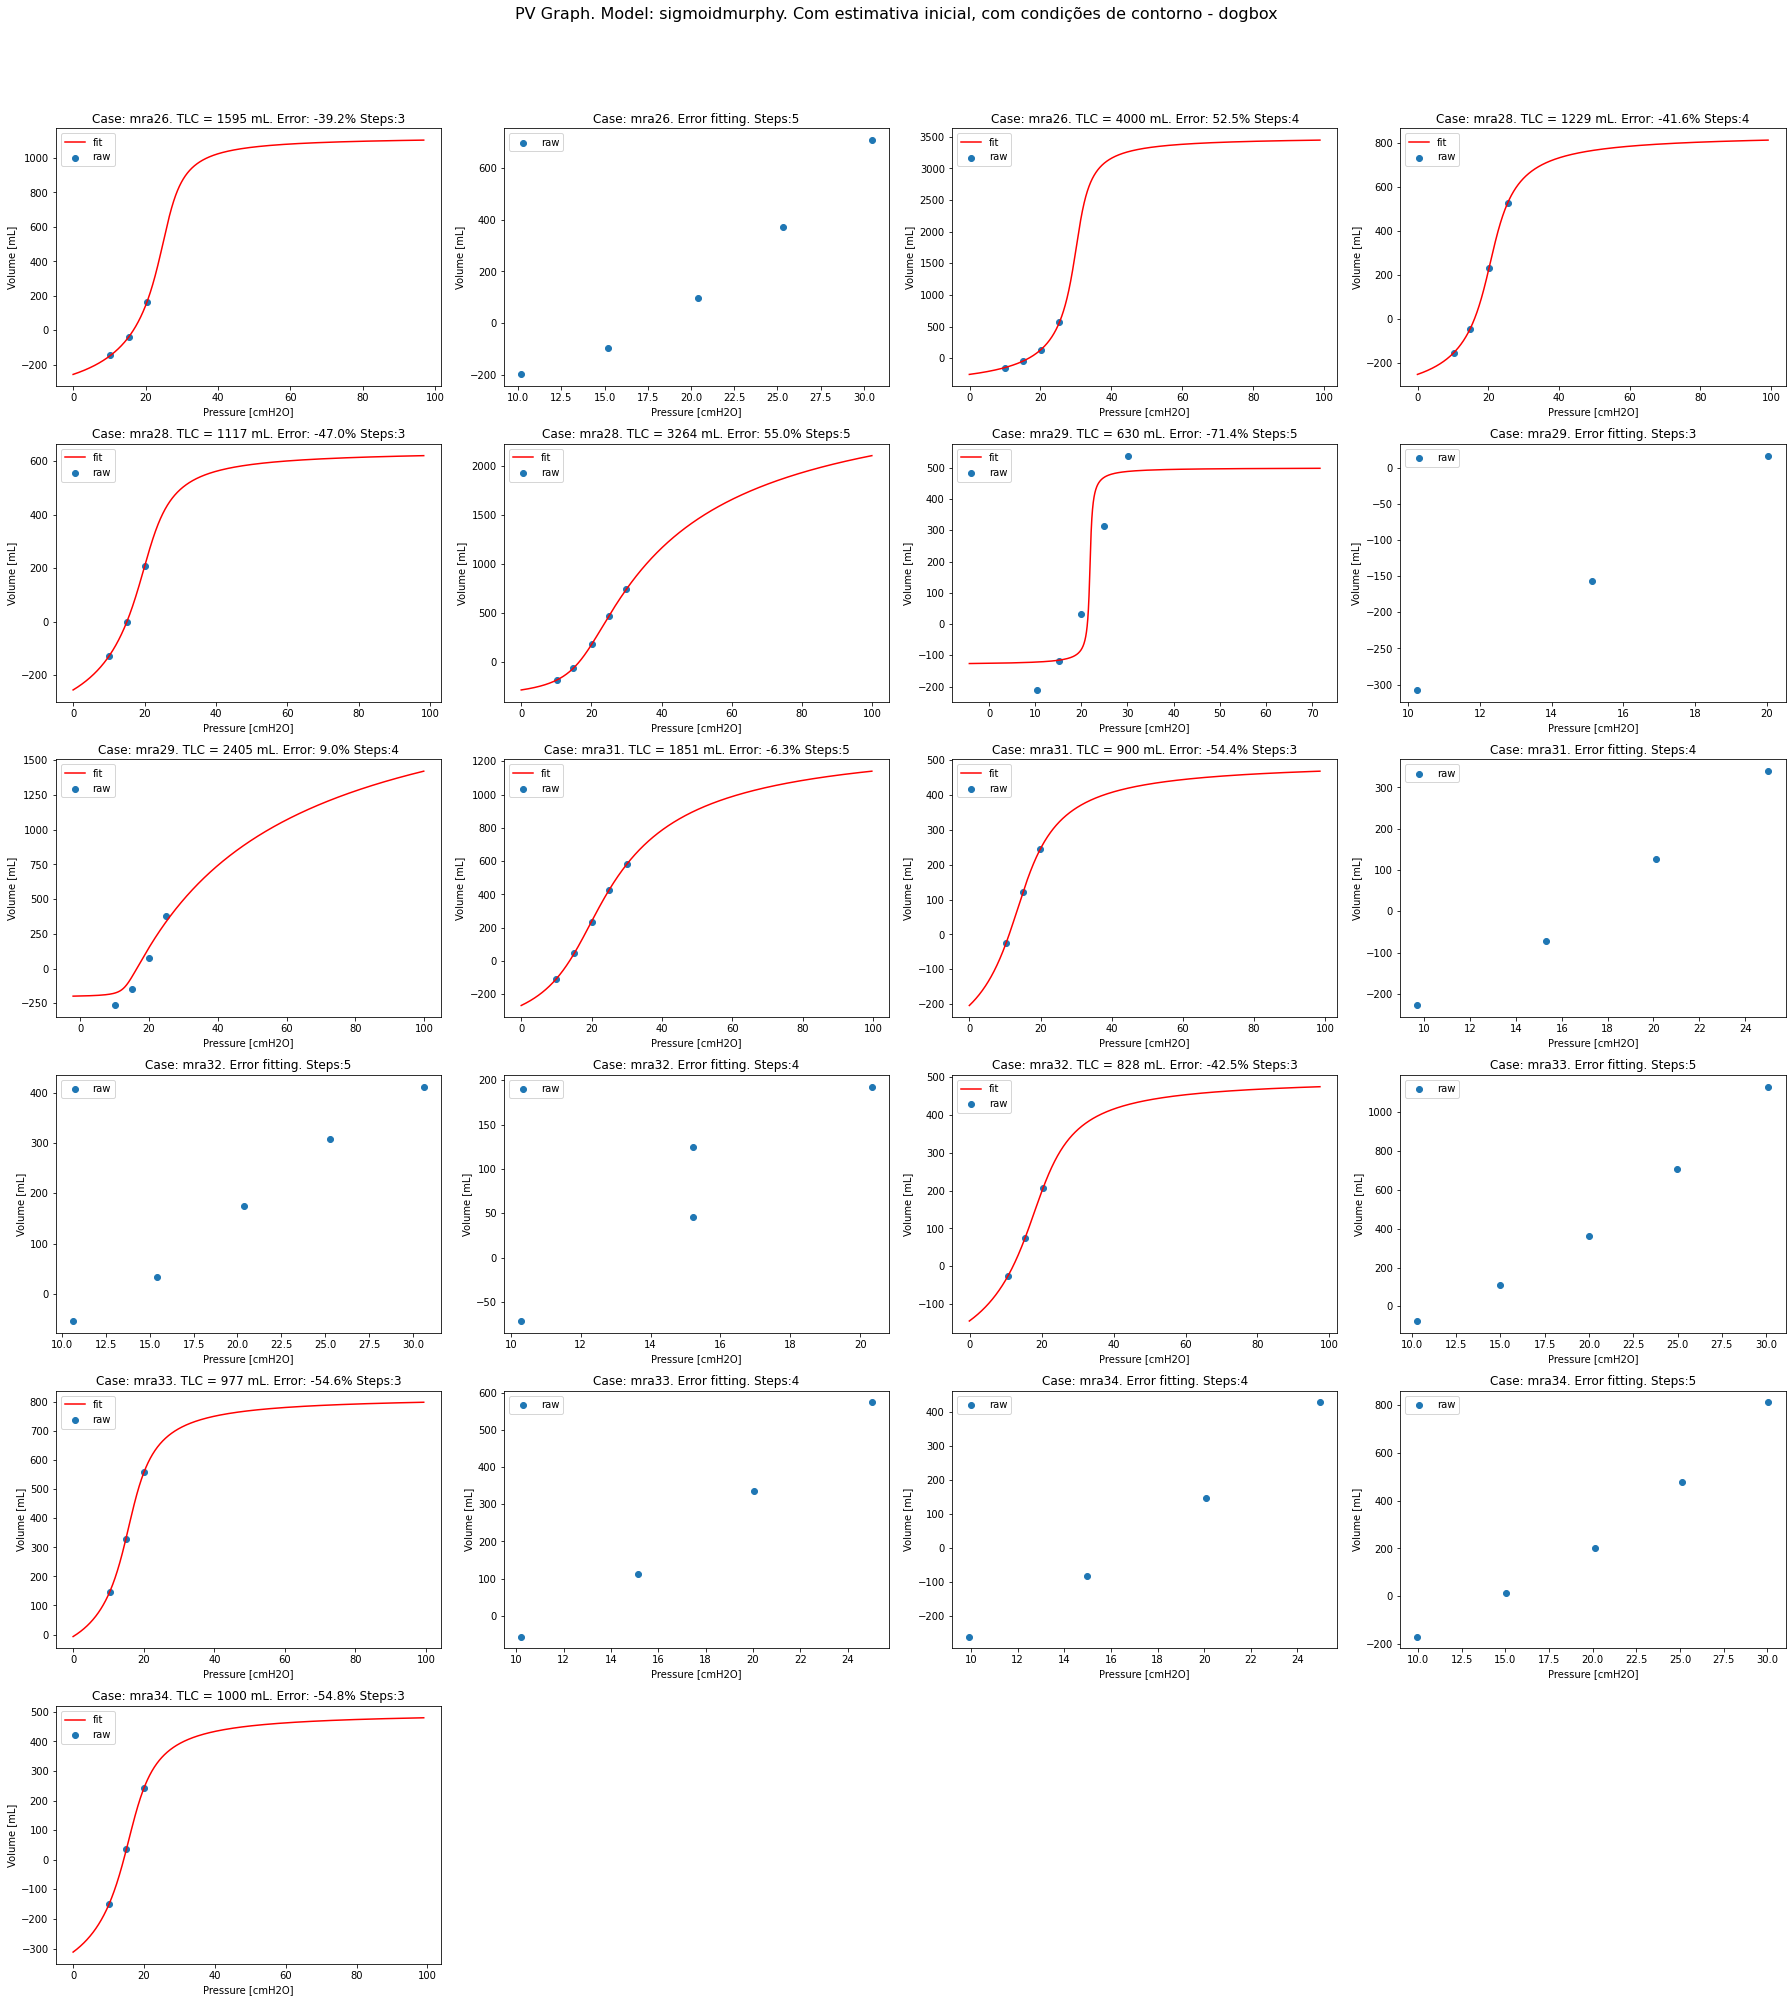

Norma(erro): 165.0. Erro médio: 44.03%. Ajustados: 12.


In [59]:
modelo = m.sigmoidmurphy
metodo = 'dogbox'
texto = 'Com estimativa inicial, com condições de contorno - dogbox'
TLC_index = 0
invert_PV = True
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =  [ 2000.0,  -200.0,  1000.0,  1000.0,    20.0]
meus_bounds = ([    500,    -500,     100,     100,    -100],
              [   3500,       0,  100000,  100000,     100])
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV, df_final=df_final, meu_p0 = meu_p0, meus_bounds = meus_bounds)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidmurphy - Com estimativa inicial, com condições de contorno.
#### Método trf

Testando caso 0: mra26: [ 1338.2  -319.1 17938.7  1859.8     8.9 ]
Testando caso 1: mra26: [ 3500.0  -452.6 100000.0  3761.3    -2.1 ]
Testando caso 2: mra26: [ 3499.8  -500.0  3550.3  7949.9    31.6 ]
Testando caso 3: mra28: [ 1617.8  -289.5 22816.9  1177.9     6.0 ]
Testando caso 4: mra28: [ 1445.2  -369.8 20633.6  2649.7     7.9 ]
Testando caso 5: mra28: [ 2872.4  -391.4 82597.4  2079.0    -7.0 ]
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
Testando caso 9: mra31: [ 1350.8  -500.0 19650.3  4908.9     9.0 ]
Testando caso 10: mra31: [ 1004.7  -454.2 23540.4  1654.7    -8.7 ]
	Caso 11 (mra31) deu erro... Steps:4
Testando caso 12: mra32: [  790.4  -214.4  8477.6  1655.0    10.9 ]
Testando caso 13: mra32: [ 3499.6  -500.0 44581.9  5801.3    11.3 ]
Testando caso 14: mra32: [  644.0  -500.0  2729.8 10928.8    29.6 ]
Testando caso 15: mra33: [ 3500.0  -500.0 67655.6  6027.9     5.4 ]
Testando caso 16: mra33: [ 1048.2  -318.4  45

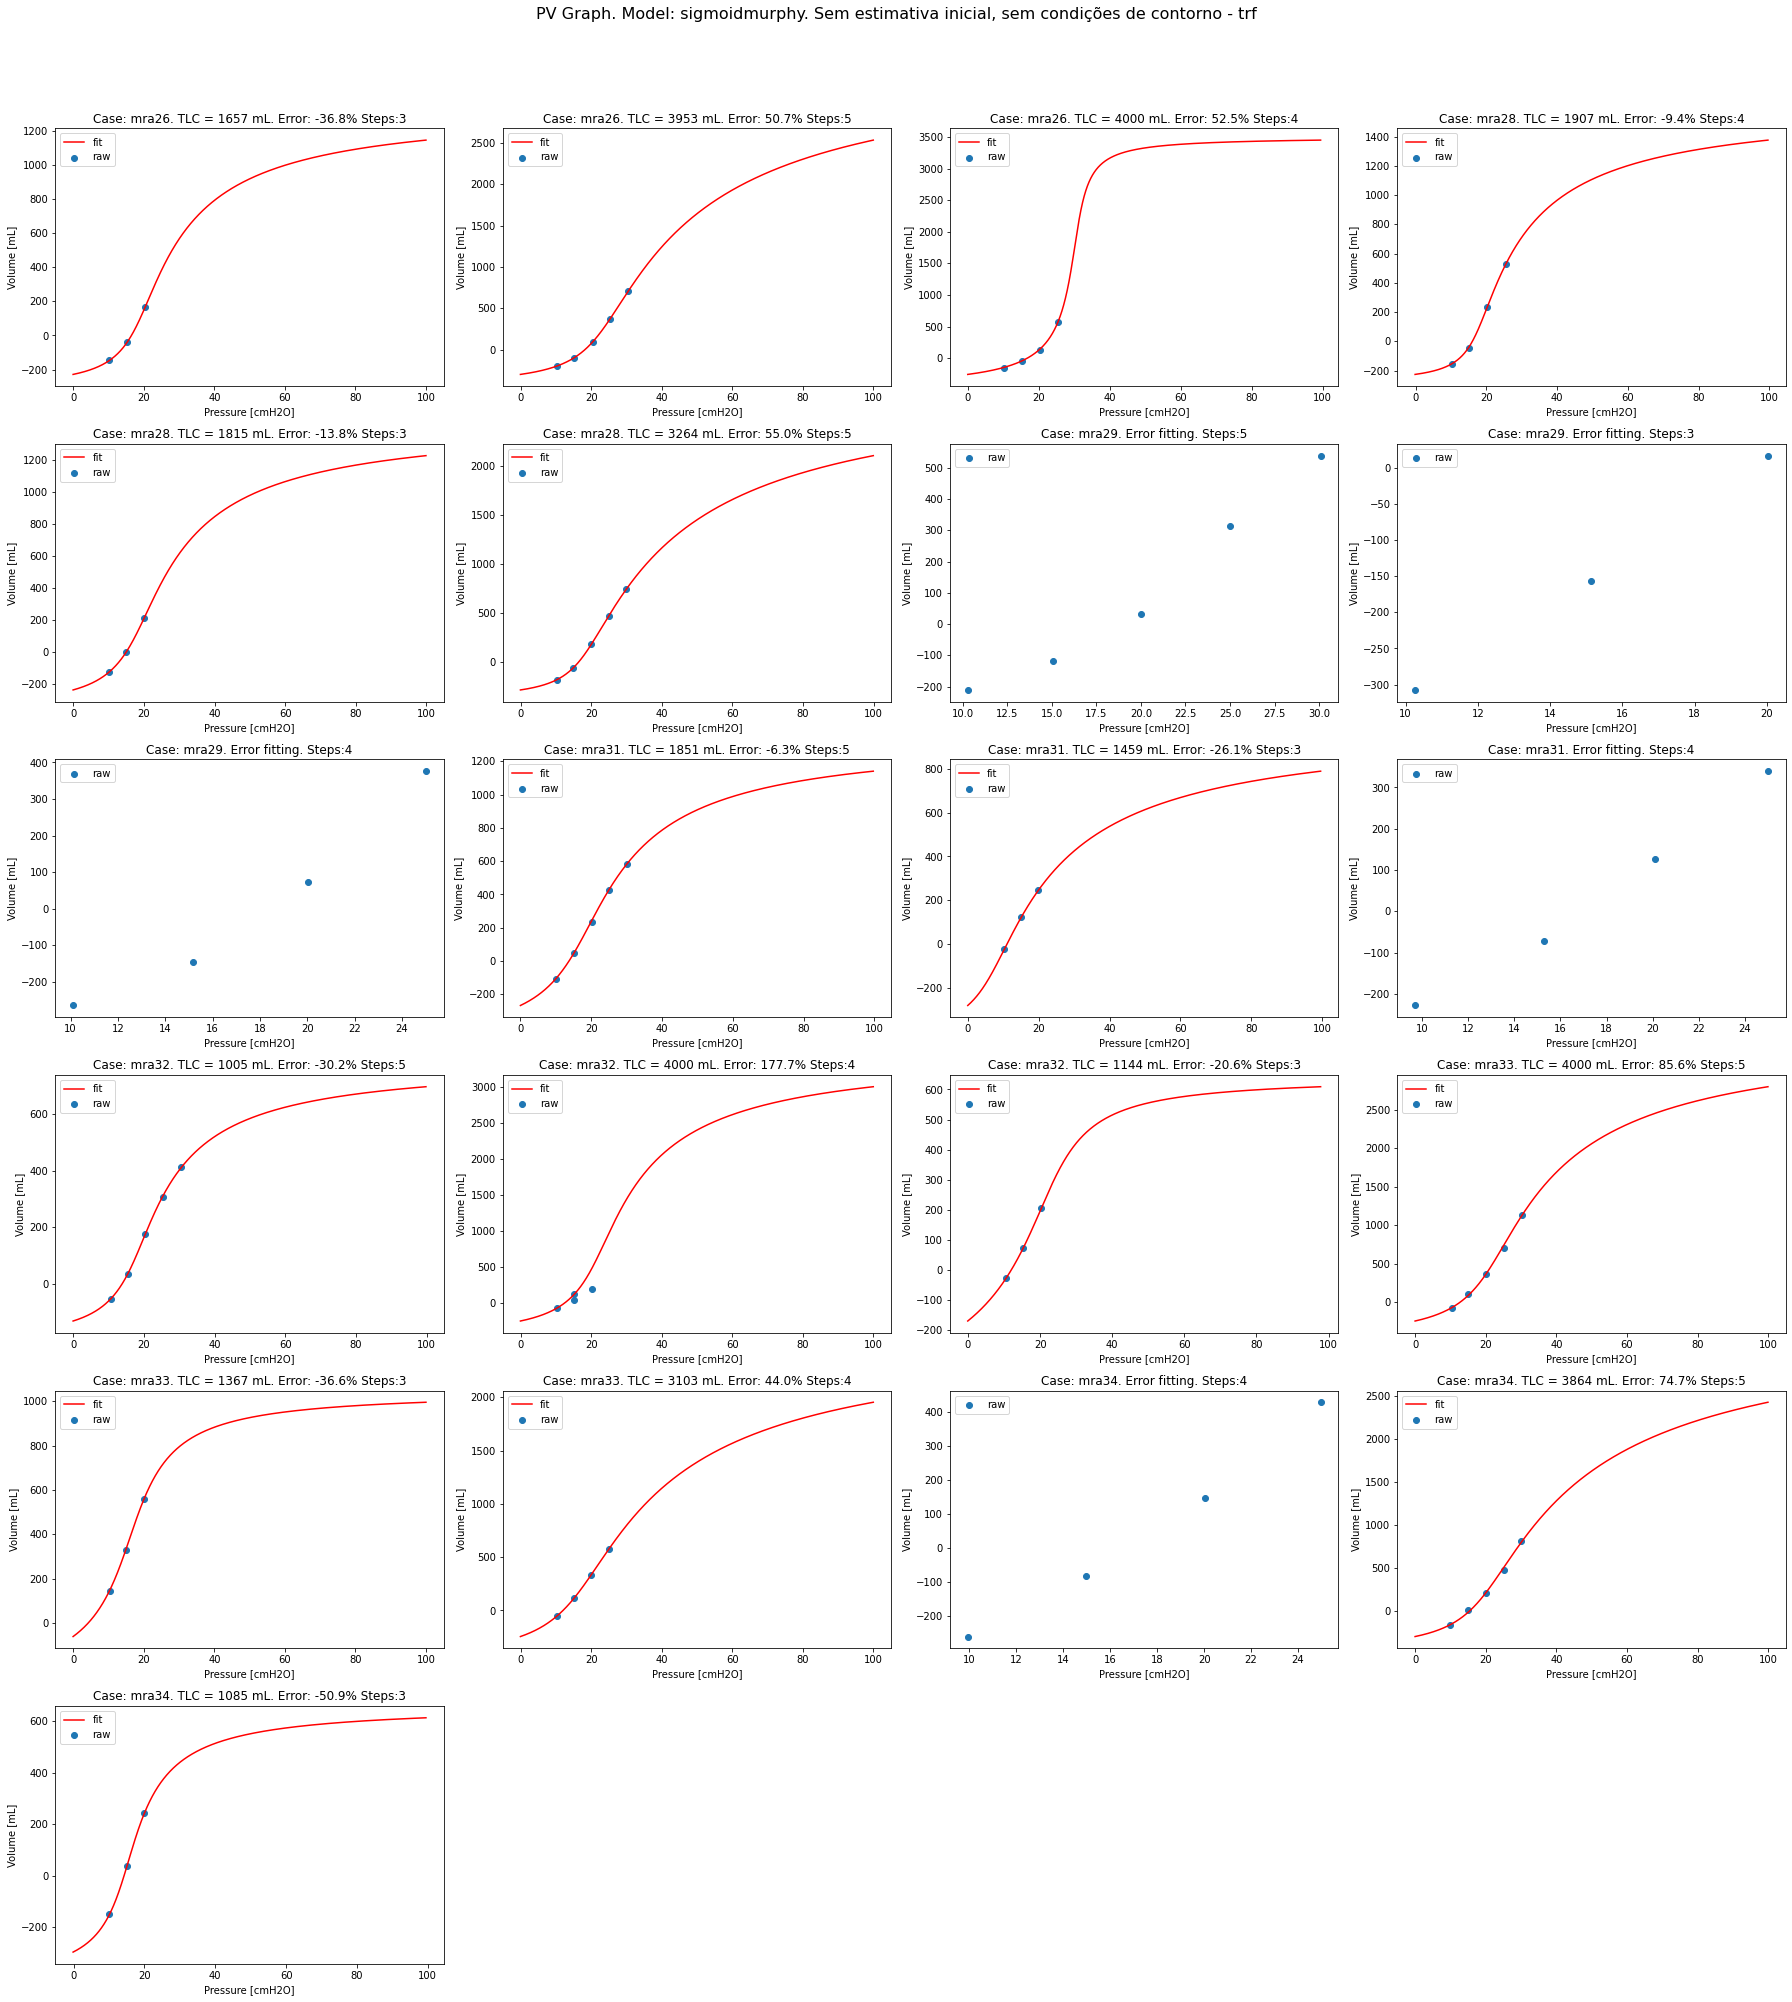

Norma(erro): 249.8. Erro médio: 48.19%. Ajustados: 16.


In [60]:
modelo = m.sigmoidmurphy
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 0
invert_PV = True
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =  [ 2000.0,  -200.0,  1000.0,  1000.0,    20.0]
meus_bounds = ([    500,    -500,     100,     100,    -100],
              [   3500,       0,  100000,  100000,     100])
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV, df_final=df_final, meu_p0 = meu_p0, meus_bounds = meus_bounds)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

In [61]:
df_final

,modelo,metodo,norma_do_erro,erro_medio,ajustados,n_pontos_interpolacao
0,sigmoidvenegas1,lm,181.647251,52.314628,10,0.0
1,sigmoidvenegas1,dogbox,197.766635,40.862448,20,0.0
2,sigmoidvenegas1,trf,204.241108,42.186811,20,0.0
3,sigmoidpaivaoffset,lm,181.647240,52.314626,10,0.0
4,sigmoidpaivaoffset,dogbox,198.557046,40.852708,20,0.0
5,sigmoidpaivaoffset,trf,212.477891,44.256380,21,0.0
6,sigmoidvenegas2offset,lm,-1.000000,-1.000000,0,0.0
7,sigmoidvenegas2offset,dogbox,163.418769,30.333644,18,0.0
8,sigmoidvenegas2offset,trf,173.322293,36.487375,19,0.0
9,sigmoidmurphy,lm,47.551696,26.161657,3,0.0


In [62]:
df_modelo_por_ajustados = df_final.groupby('modelo', as_index=False)[['ajustados']].sum()
df_modelo_por_ajustados

,modelo,ajustados
0,sigmoidmurphy,31
1,sigmoidpaivaoffset,51
2,sigmoidvenegas1,50
3,sigmoidvenegas2offset,37


Text(0.5, 0.98, 'Quantidade de Ajustados por Modelo')

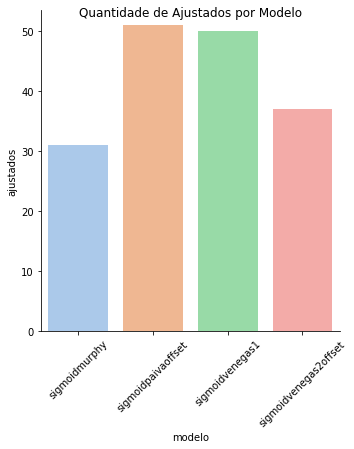

In [63]:
modelosxajustados = sns.catplot(x="modelo", y="ajustados", kind="bar", palette="pastel", data=df_modelo_por_ajustados)#.set_title("Quantidade de Ajustados por Modelo")
modelosxajustados.set_xticklabels(rotation=45).fig.suptitle('Quantidade de Ajustados por Modelo')




Text(0.5, 0.98, 'Erro medio por Modelo')

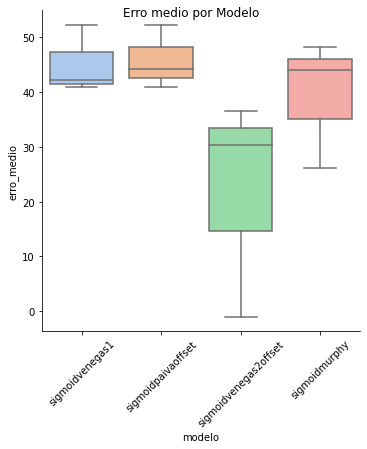

In [68]:
modelosxerro = sns.catplot(x="modelo", y="erro_medio", kind="box", palette="pastel", data=df_final)
modelosxerro.set_xticklabels(rotation=45).fig.suptitle('Erro medio por Modelo')


In [85]:
df_modelo_por_ajustados = df_final.groupby('modelo', as_index=False)[['erro_medio']].median()
df_modelo_por_ajustados

,modelo,erro_medio
0,sigmoidmurphy,44.033000
1,sigmoidpaivaoffset,44.256380
2,sigmoidvenegas1,42.186811
3,sigmoidvenegas2offset,30.333644


#### sigmoidvenegas1 - gráfico por step


In [72]:
sigmoidvenegas1_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidvenegas1'].loc[df_resultados['Ajustado'] == True]
sigmoidvenegas1_df

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",2622.9,sigmoidvenegas1,lm,True,-35.3537,0.0
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9,sigmoidvenegas1,lm,True,-56.2664,0.0
5,mra28,D,"[[10.240625381469727, -179.3195037841797], [20...",5,"[10.240625381469727, 14.828125, 20.05937480926...","[-179.3195037841797, -62.187042236328125, 182....",2105.9,sigmoidvenegas1,lm,True,-34.2708,0.0
6,mra29,D,"[[10.286250114440918, -210.43722534179688], [2...",5,"[10.286250114440918, 15.094120502471924, 19.99...","[-210.43722534179688, -118.89096069335938, 33....",2205.7,sigmoidvenegas1,lm,True,-56.0993,0.0
8,mra29,C,"[[10.105555534362793, -265.270263671875], [20....",4,"[10.105555534362793, 15.18842601776123, 20.045...","[-265.270263671875, -145.95188903808594, 74.12...",2205.7,sigmoidvenegas1,lm,True,-44.7286,0.0
9,mra31,D,"[[10.0, -107.7169418334961], [20.2000007629394...",5,"[10.0, 15.0, 20.100000381469727, 24.8999996185...","[-107.7169418334961, 47.35507583618164, 235.19...",1974.4,sigmoidvenegas1,lm,True,-42.3767,0.0
11,mra31,C,"[[9.699999809265137, -228.3211212158203], [20....",4,"[9.699999809265137, 15.300000190734863, 20.100...","[-228.3211212158203, -71.18547058105469, 125.5...",1974.4,sigmoidvenegas1,lm,True,-45.7617,0.0
12,mra32,D,"[[10.625260829925537, -53.54884338378906], [20...",5,"[10.625260829925537, 15.398958206176758, 20.37...","[-53.54884338378906, 33.332923889160156, 174.5...",1440.2,sigmoidvenegas1,lm,True,-55.9207,0.0
15,mra33,D,"[[10.312239646911621, -75.62246704101562], [20...",5,"[10.312239646911621, 14.991406440734863, 20.00...","[-75.62246704101562, 107.81485748291016, 363.4...",2154.6,sigmoidvenegas1,lm,True,118.802,0.0
17,mra33,C,"[[10.202864646911621, -56.06181335449219], [20...",4,"[10.202864646911621, 15.145573139190674, 20.05...","[-56.06181335449219, 113.50151824951172, 334.8...",2154.6,sigmoidvenegas1,lm,True,-33.5664,0.0


,Animal,Manobra,Dados,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
n_steps,,,,,,,,,,,
3,13,13,13,13,13,13,13,13,13,13,13
4,18,18,18,18,18,18,18,18,18,18,18
5,19,19,19,19,19,19,19,19,19,19,19


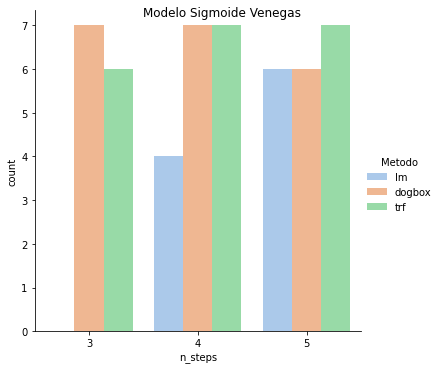

In [73]:
stepsxajustados = sns.catplot(x="n_steps", kind="count", hue="Metodo",
            palette="pastel", data=sigmoidvenegas1_df).fig.suptitle('Modelo Sigmoide Venegas')



sigmoidvenegas1_df.groupby('n_steps').count()


In [74]:
sigmoidvenegas1_df.groupby('Metodo').count()

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Ajustado,Erro,n_pontos_interpolacao
Metodo,,,,,,,,,,,
dogbox,20,20,20,20,20,20,20,20,20,20,20
lm,10,10,10,10,10,10,10,10,10,10,10
trf,20,20,20,20,20,20,20,20,20,20,20


#### sigmoidpaivaoffset - gráfico por step

In [75]:
sigmoidpaivaoffset_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidpaivaoffset'].loc[df_resultados['Ajustado'] == True]
sigmoidpaivaoffset_df.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
64,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",2622.9,sigmoidpaivaoffset,lm,True,-35.3537,0.0
66,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9,sigmoidpaivaoffset,lm,True,-56.2664,0.0
68,mra28,D,"[[10.240625381469727, -179.3195037841797], [20...",5,"[10.240625381469727, 14.828125, 20.05937480926...","[-179.3195037841797, -62.187042236328125, 182....",2105.9,sigmoidpaivaoffset,lm,True,-34.2708,0.0
69,mra29,D,"[[10.286250114440918, -210.43722534179688], [2...",5,"[10.286250114440918, 15.094120502471924, 19.99...","[-210.43722534179688, -118.89096069335938, 33....",2205.7,sigmoidpaivaoffset,lm,True,-56.0993,0.0
71,mra29,C,"[[10.105555534362793, -265.270263671875], [20....",4,"[10.105555534362793, 15.18842601776123, 20.045...","[-265.270263671875, -145.95188903808594, 74.12...",2205.7,sigmoidpaivaoffset,lm,True,-44.7286,0.0


,Animal,Manobra,Dados,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
n_steps,,,,,,,,,,,
3,14,14,14,14,14,14,14,14,14,14,14
4,18,18,18,18,18,18,18,18,18,18,18
5,19,19,19,19,19,19,19,19,19,19,19


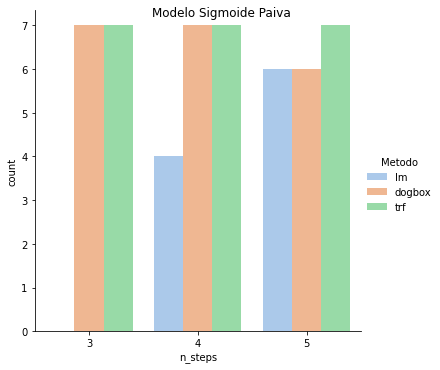

In [76]:
stepsxajustados_1 = sns.catplot(x="n_steps", kind="count", hue="Metodo",
            palette="pastel", data=sigmoidpaivaoffset_df).fig.suptitle('Modelo Sigmoide Paiva')

sigmoidpaivaoffset_df.groupby('n_steps').count()

In [77]:
sigmoidpaivaoffset_df.groupby('Metodo').count()

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Ajustado,Erro,n_pontos_interpolacao
Metodo,,,,,,,,,,,
dogbox,20,20,20,20,20,20,20,20,20,20,20
lm,10,10,10,10,10,10,10,10,10,10,10
trf,21,21,21,21,21,21,21,21,21,21,21


#### sigmoidvenegas2offset - gráfico por step

In [78]:
sigmoidvenegas2offset_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidvenegas2offset'].loc[df_resultados['Ajustado'] == True]
sigmoidvenegas2offset_df.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
147,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",2622.9,sigmoidvenegas2offset,dogbox,True,-23.8146,0.0
149,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",2622.9,sigmoidvenegas2offset,dogbox,True,33.4401,0.0
150,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9,sigmoidvenegas2offset,dogbox,True,-12.2723,0.0
151,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9,sigmoidvenegas2offset,dogbox,True,-5.13055,0.0
153,mra29,D,"[[10.286250114440918, -210.43722534179688], [2...",5,"[10.286250114440918, 15.094120502471924, 19.99...","[-210.43722534179688, -118.89096069335938, 33....",2205.7,sigmoidvenegas2offset,dogbox,True,-77.3315,0.0


,Animal,Manobra,Dados,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
n_steps,,,,,,,,,,,
3,14,14,14,14,14,14,14,14,14,14,14
4,14,14,14,14,14,14,14,14,14,14,14
5,9,9,9,9,9,9,9,9,9,9,9


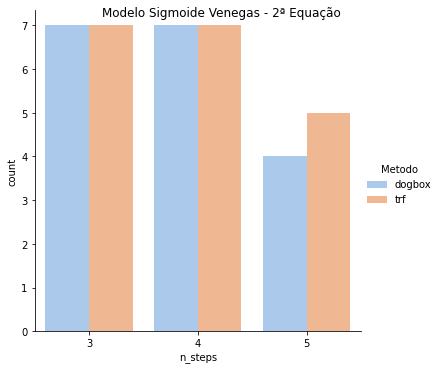

In [79]:
stepsxajustados_2 = sns.catplot(x="n_steps", kind="count", hue="Metodo",
            palette="pastel", data=sigmoidvenegas2offset_df).fig.suptitle('Modelo Sigmoide Venegas - 2ª Equação')

sigmoidvenegas2offset_df.groupby('n_steps').count()

In [80]:
sigmoidvenegas2offset_df.groupby('Metodo').count()

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Ajustado,Erro,n_pontos_interpolacao
Metodo,,,,,,,,,,,
dogbox,18,18,18,18,18,18,18,18,18,18,18
trf,19,19,19,19,19,19,19,19,19,19,19


#### sigmoidmurphy - gráfico por step

In [81]:
sigmoidmurphy_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidmurphy'].loc[df_resultados['Ajustado'] == True]
sigmoidmurphy_df.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
198,mra31,D,"[[10.0, -107.7169418334961], [20.2000007629394...",5,"[10.0, 15.0, 20.100000381469727, 24.8999996185...","[-107.7169418334961, 47.35507583618164, 235.19...",1974.4,sigmoidmurphy,lm,True,14.5605,0.0
201,mra32,D,"[[10.625260829925537, -53.54884338378906], [20...",5,"[10.625260829925537, 15.398958206176758, 20.37...","[-53.54884338378906, 33.332923889160156, 174.5...",1440.2,sigmoidmurphy,lm,True,-30.2322,0.0
204,mra33,D,"[[10.312239646911621, -75.62246704101562], [20...",5,"[10.312239646911621, 14.991406440734863, 20.00...","[-75.62246704101562, 107.81485748291016, 363.4...",2154.6,sigmoidmurphy,lm,True,33.6923,0.0
210,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",2622.9,sigmoidmurphy,dogbox,True,-39.1938,0.0
212,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",2622.9,sigmoidmurphy,dogbox,True,52.503,0.0


,Animal,Manobra,Dados,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
n_steps,,,,,,,,,,,
3,12,12,12,12,12,12,12,12,12,12,12
4,7,7,7,7,7,7,7,7,7,7,7
5,12,12,12,12,12,12,12,12,12,12,12


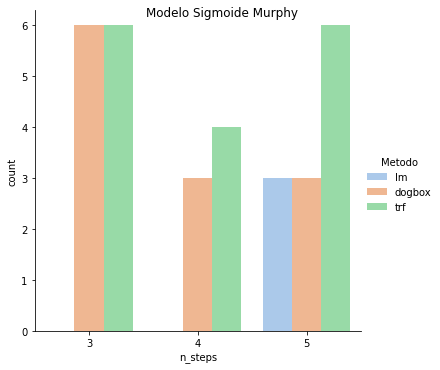

In [82]:
stepsxajustados_3 = sns.catplot(x="n_steps", kind="count", hue="Metodo",
            palette="pastel", data=sigmoidmurphy_df).fig.suptitle('Modelo Sigmoide Murphy')

sigmoidmurphy_df.groupby('n_steps').count()

In [83]:
sigmoidmurphy_df.groupby('Metodo').count()

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Ajustado,Erro,n_pontos_interpolacao
Metodo,,,,,,,,,,,
dogbox,12,12,12,12,12,12,12,12,12,12,12
lm,3,3,3,3,3,3,3,3,3,3,3
trf,16,16,16,16,16,16,16,16,16,16,16
